___
# Loading the data and libraries
___

In [ ]:
%load_ext autoreload
%autoreload 2

# Base packages
import os
import sys
import re
import warnings
from typing import Optional, List, Literal

while any(marker in os.getcwd() for marker in ['workspace_bulldozers_gh']):
    os.chdir("..")

# Append 'classes_and_functions' directory to sys.path
sys.path.append('classes_and_functions_bulldozers_gh')

# Get the current working directory
current_directory = os.getcwd()
current_directory

In [22]:
# Third-party packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline

# Custom packages
from classes_and_functions_bulldozers_gh.custom_functions_classes import (
    DropColumnTransformer,
    CustomImputer,
    CustomStandardScaler,
    CustomLabelEncoder,
    CustomOneHotEncoder,
    CustomOrdinalEncoder,
    CustomOutlierDetector,
    CustomOutlierRemover,
    CustomMinMaxScaler,
    NaNIndicator,
    CustomCategoryDivider,
    CustomWhitespaceRemover,
    calculate_metrics,
    unique_column_content_check,
    aggregate_metrics_and_create_heatmaps,
    corr_matrix_dataframe,
    perform_statistical_tests,
)

In [23]:
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)
raw_data = pd.read_csv('attachments_bulldozers_gh/TrainAndValid.csv')
raw_data.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand         saledate  ...  \
0                      68.0       Low  11/16/2006 0:00  ...   
1                    4640.0       Low   3/26/2004 0:00  ...   
2                    2838.0      High   2/26/2004 0:00  ...   
3                    3486.0      High   5/19/2011 0:00  ...   
4                     722.0    Medium   7/23/2009 0:00  ...   

  Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer Grouser_Type  \
0                     NaN          NaN   NaN             NaN          NaN   
1                     NaN          NaN   NaN             NaN          NaN   
2                     NaN          NaN   NaN             NaN          NaN   
3                     NaN          NaN   NaN             NaN          NaN   
4                     NaN          NaN   NaN             NaN          NaN   

  Backhoe_Mounting Blade_Type Travel_Controls Differential_Type  \
0              NaN        NaN             NaN          Standard   
1              NaN        NaN             NaN          Standard   
2              NaN        NaN             NaN               NaN   
3              NaN        NaN             NaN               NaN   
4              NaN        NaN             NaN               NaN   

  Steering_Controls  
0      Conventional  
1      Conventional  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 53 columns]

___
# ***EDA*** Before Cleaning
___ 

In [24]:
raw_data.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [25]:
print("\nSummary statistics for numerical variables:")
print(raw_data.describe())


Summary statistics for numerical variables:
            SalesID      SalePrice     MachineID        ModelID  \
count  4.126980e+05  412698.000000  4.126980e+05  412698.000000   
mean   2.011161e+06   31215.181414  1.230061e+06    6947.201828   
std    1.080068e+06   23141.743695  4.539533e+05    6280.824982   
min    1.139246e+06    4750.000000  0.000000e+00      28.000000   
25%    1.421898e+06   14500.000000  1.088593e+06    3261.000000   
50%    1.645852e+06   24000.000000  1.284397e+06    4605.000000   
75%    2.261012e+06   40000.000000  1.478079e+06    8899.000000   
max    6.333349e+06  142000.000000  2.486330e+06   37198.000000   

          datasource   auctioneerID       YearMade  MachineHoursCurrentMeter  
count  412698.000000  392562.000000  412698.000000              1.475040e+05  
mean      135.169361       6.585268    1899.049637              3.522988e+03  
std         9.646749      17.158409     292.190243              2.716993e+04  
min       121.000000       0.000000

In [26]:
raw_data.describe().columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter'],
      dtype='object')

Just checking, whether we displayed all of the columns with int/float type

In [27]:
print(np.sort(raw_data['YearMade'].unique()))

[1000 1919 1920 1937 1942 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014]


We can already see, that there are outliers in YearMade feature, unless they are a trebuchet

In [28]:
print("\nSummary statistics for categorical variables:")
for column in raw_data.select_dtypes(include=['object']).columns:
    print("\n", column, ":")
    print(raw_data[column].value_counts())


Summary statistics for categorical variables:

 UsageBand :
UsageBand
Medium    35832
Low       25311
High      12527
Name: count, dtype: int64

 saledate :
saledate
2/16/2009 0:00     1932
2/13/2012 0:00     1598
2/15/2011 0:00     1352
2/19/2008 0:00     1300
2/15/2010 0:00     1219
                   ... 
1/4/2011 0:00         1
5/8/2007 0:00         1
1/12/2009 0:00        1
9/3/2010 0:00         1
10/11/1997 0:00       1
Name: count, Length: 4013, dtype: int64

 fiModelDesc :
fiModelDesc
310G      5348
416C      4976
580K      4364
310E      4296
140G      4186
          ... 
130          1
EL240B       1
365BL        1
716A         1
55N2         1
Name: count, Length: 5059, dtype: int64

 fiBaseModel :
fiBaseModel
580       20179
310       17886
D6        13527
416       12900
D5         9636
          ...  
R50           1
3D1700        1
901           1
805           1
PC1500        1
Name: count, Length: 1961, dtype: int64

 fiSecondaryDesc :
fiSecondaryDesc
C       44431
B 

In [29]:
unique_column_content_check(raw_data)

{'UsageBand': (array(['Low', 'High', 'Medium', nan], dtype=object), 4),
 'saledate': (array(['11/16/2006 0:00', '3/26/2004 0:00', '2/26/2004 0:00', ...,
         '3/10/2012 0:00', '3/9/2012 0:00', '4/14/2012 0:00'], dtype=object),
  4013),
 'fiModelDesc': (array(['521D', '950FII', '226', ..., '716AVHP', '530E', '55N2'],
        dtype=object),
  5059),
 'fiBaseModel': (array(['521', '950', '226', ..., '336', 'WLK15', 'R964'], dtype=object),
  1961),
 'fiSecondaryDesc': (array(['D', 'F', nan, 'G', 'E', 'HAG', 'B', 'NX', 'SUPER K', 'STD', 'BL',
         'Z', 'C', 'XT', 'A', 'H', 'MR', 'PT', 'L', 'M', 'J', 'SE', 'SXT',
         'HD', 'LC', 'SUPER M', 'LX', 'SUPER L', 'LE', 'K', 'S', 'R', 'P',
         'SG', 'US', 'UU', 'WX', 'PX', 'N', 'ZTM', 'SUPER E', 'XL', 'MXT',
         'EX', '-2', 'LCM', 'GT', 'TM', 'HZ', 'AX', 'DXT', '3', 'SR', '7',
         'ZTS', 'B     ', 'T', 'UR', '-3', 'V', 'ZT', '1', 'SUPER M PLUS',
         'BZD', 'DZ', 'WD', 'LGP', 'SRLC', 'CH', 'CS', 'M      ', 'ZHS G',
  

There are some features that are mistakingly put as a cathegorical data, when they should be numerical. Those are:
 - Blade_Width 
 - Tire_Size 
 - Undercarriage_Pad_Width 
 - Stick_Lenght

In [30]:
print('Number of nulls in different features')
raw_data.isnull().sum()

Number of nulls in different features


SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [31]:
nulls_percentage = raw_data.isnull().mean() * 100
print('Percentage of nulls in each feature')
nulls_percentage

Percentage of nulls in each feature


SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission

In [32]:
low_nulls = nulls_percentage[nulls_percentage <= 10]
print(f'Features with less than 10% of nulls:\n {low_nulls.index}')
print()

null_to_exterminate = nulls_percentage[nulls_percentage >= 40]
print(f'Features with more than 40% of nulls:\n {null_to_exterminate.index}')
print()
print(r'There is one feature with nulls between 10% and 40% - fiSecondaryDesc')

Features with less than 10% of nulls:
 Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'saledate', 'fiModelDesc', 'fiBaseModel',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Enclosure'],
      dtype='object')

Features with more than 40% of nulls:
 Index(['MachineHoursCurrentMeter', 'UsageBand', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'Drive_System', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      d

In [33]:
outlier_detector = CustomOutlierDetector(raw_data)

num_cols = ['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter']

for var in num_cols:
    outliers = outlier_detector.detect_outliers_iqr(var)

print("Outliers identified using the IQR method:")
print(outliers[num_cols])

Outliers identified using the IQR method:
        SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
6       1139256    21000.0     772701     1937         121           3.0   
9       1139275    65000.0    1016474     3883         121           3.0   
21      1139333    34500.0     999192     3350         121           3.0   
23      1139346    73000.0     821452       85         121           3.0   
29      1139358    89000.0    1018076     1333         121           3.0   
...         ...        ...        ...      ...         ...           ...   
409209  6283647    31400.0    1821827     4701         149          99.0   
410658  6300173    31000.0    1827448     2160         149          99.0   
411939  6314799    15300.0    1889581     5642         149          99.0   
412012  6315113    20200.0    1917438    17404         149          99.0   
412429  6321548     6000.0    1851563    12344         149          99.0   

        YearMade  MachineHoursCurrentMeter  


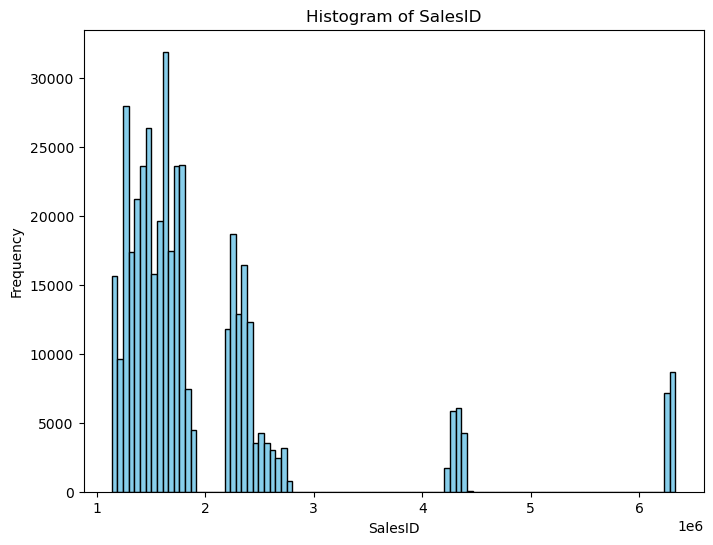

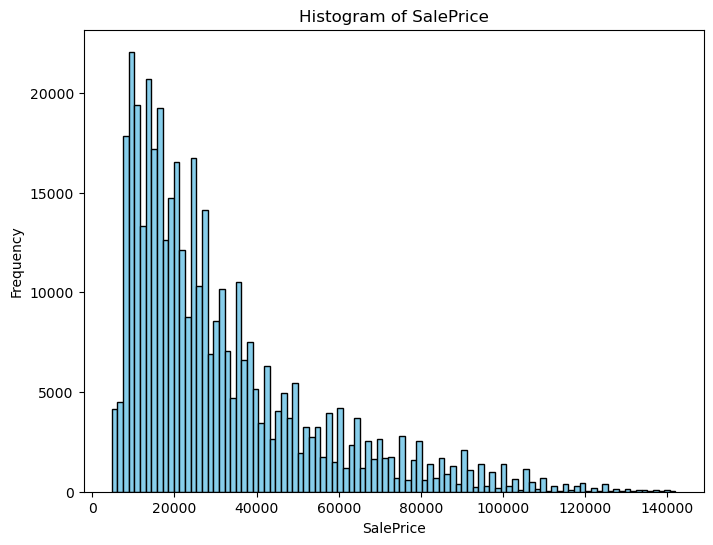

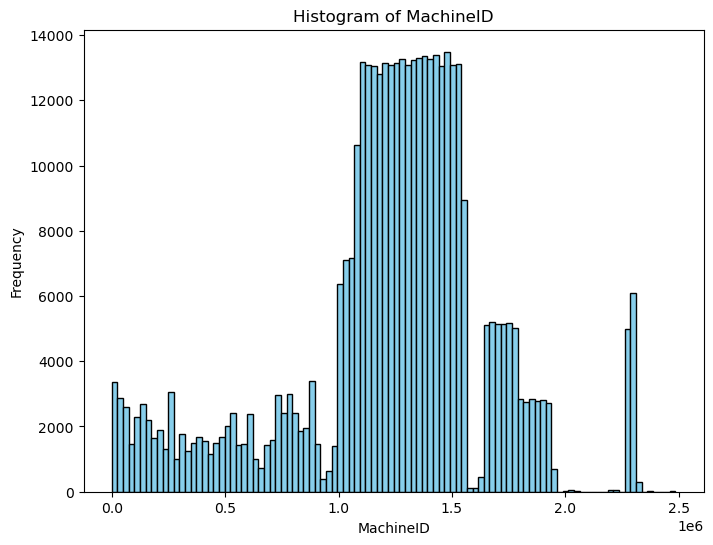

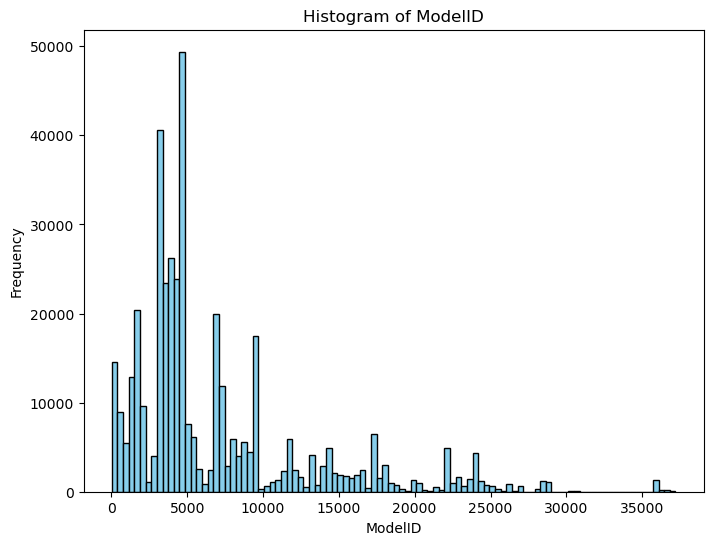

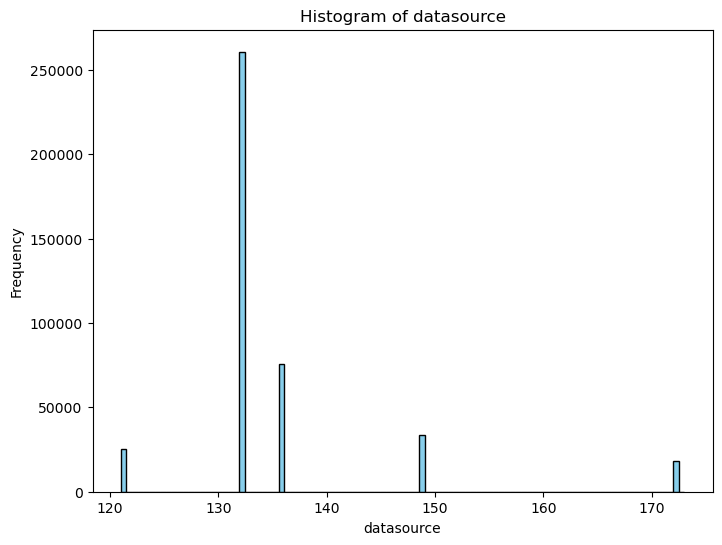

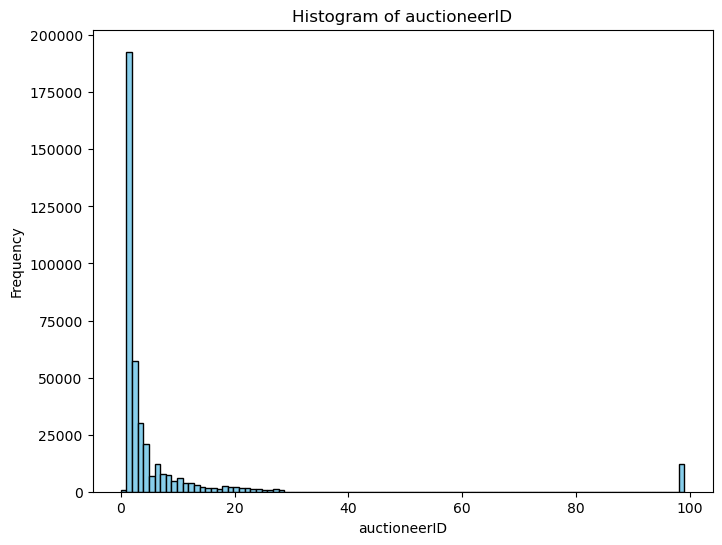

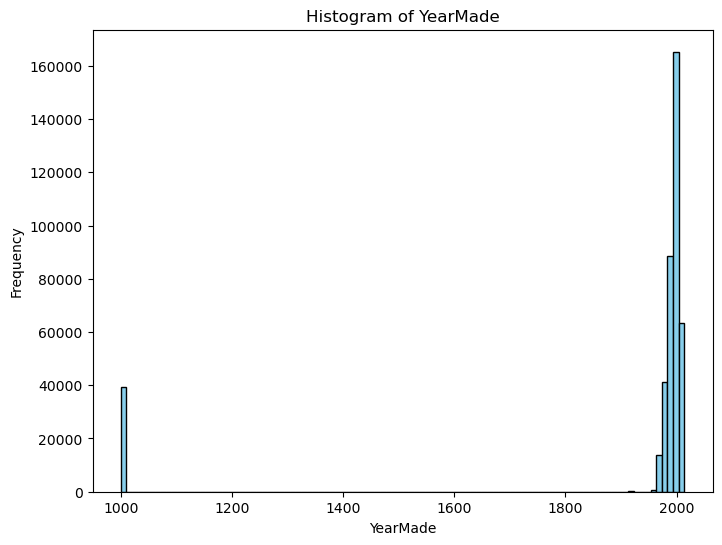

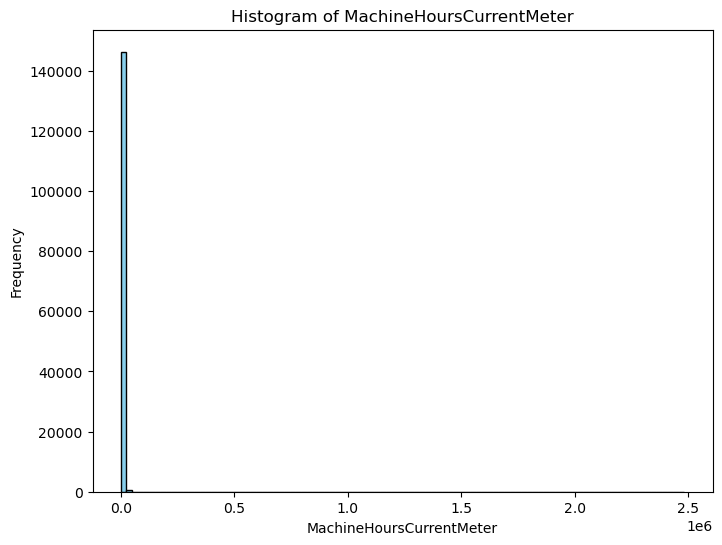

In [34]:
for var in num_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(raw_data[var], bins=100, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

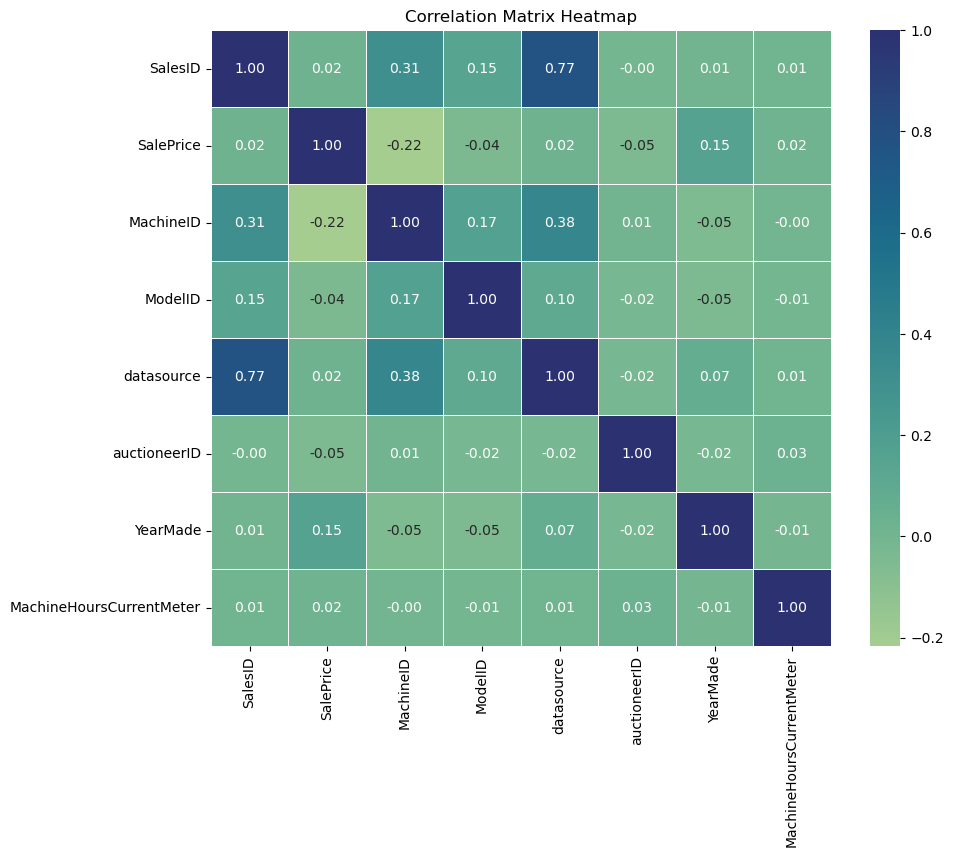

In [35]:
correlation_matrix = raw_data[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidth=.5, fmt='.2f', cmap='crest')
plt.title('Correlation Matrix Heatmap')
plt.show()

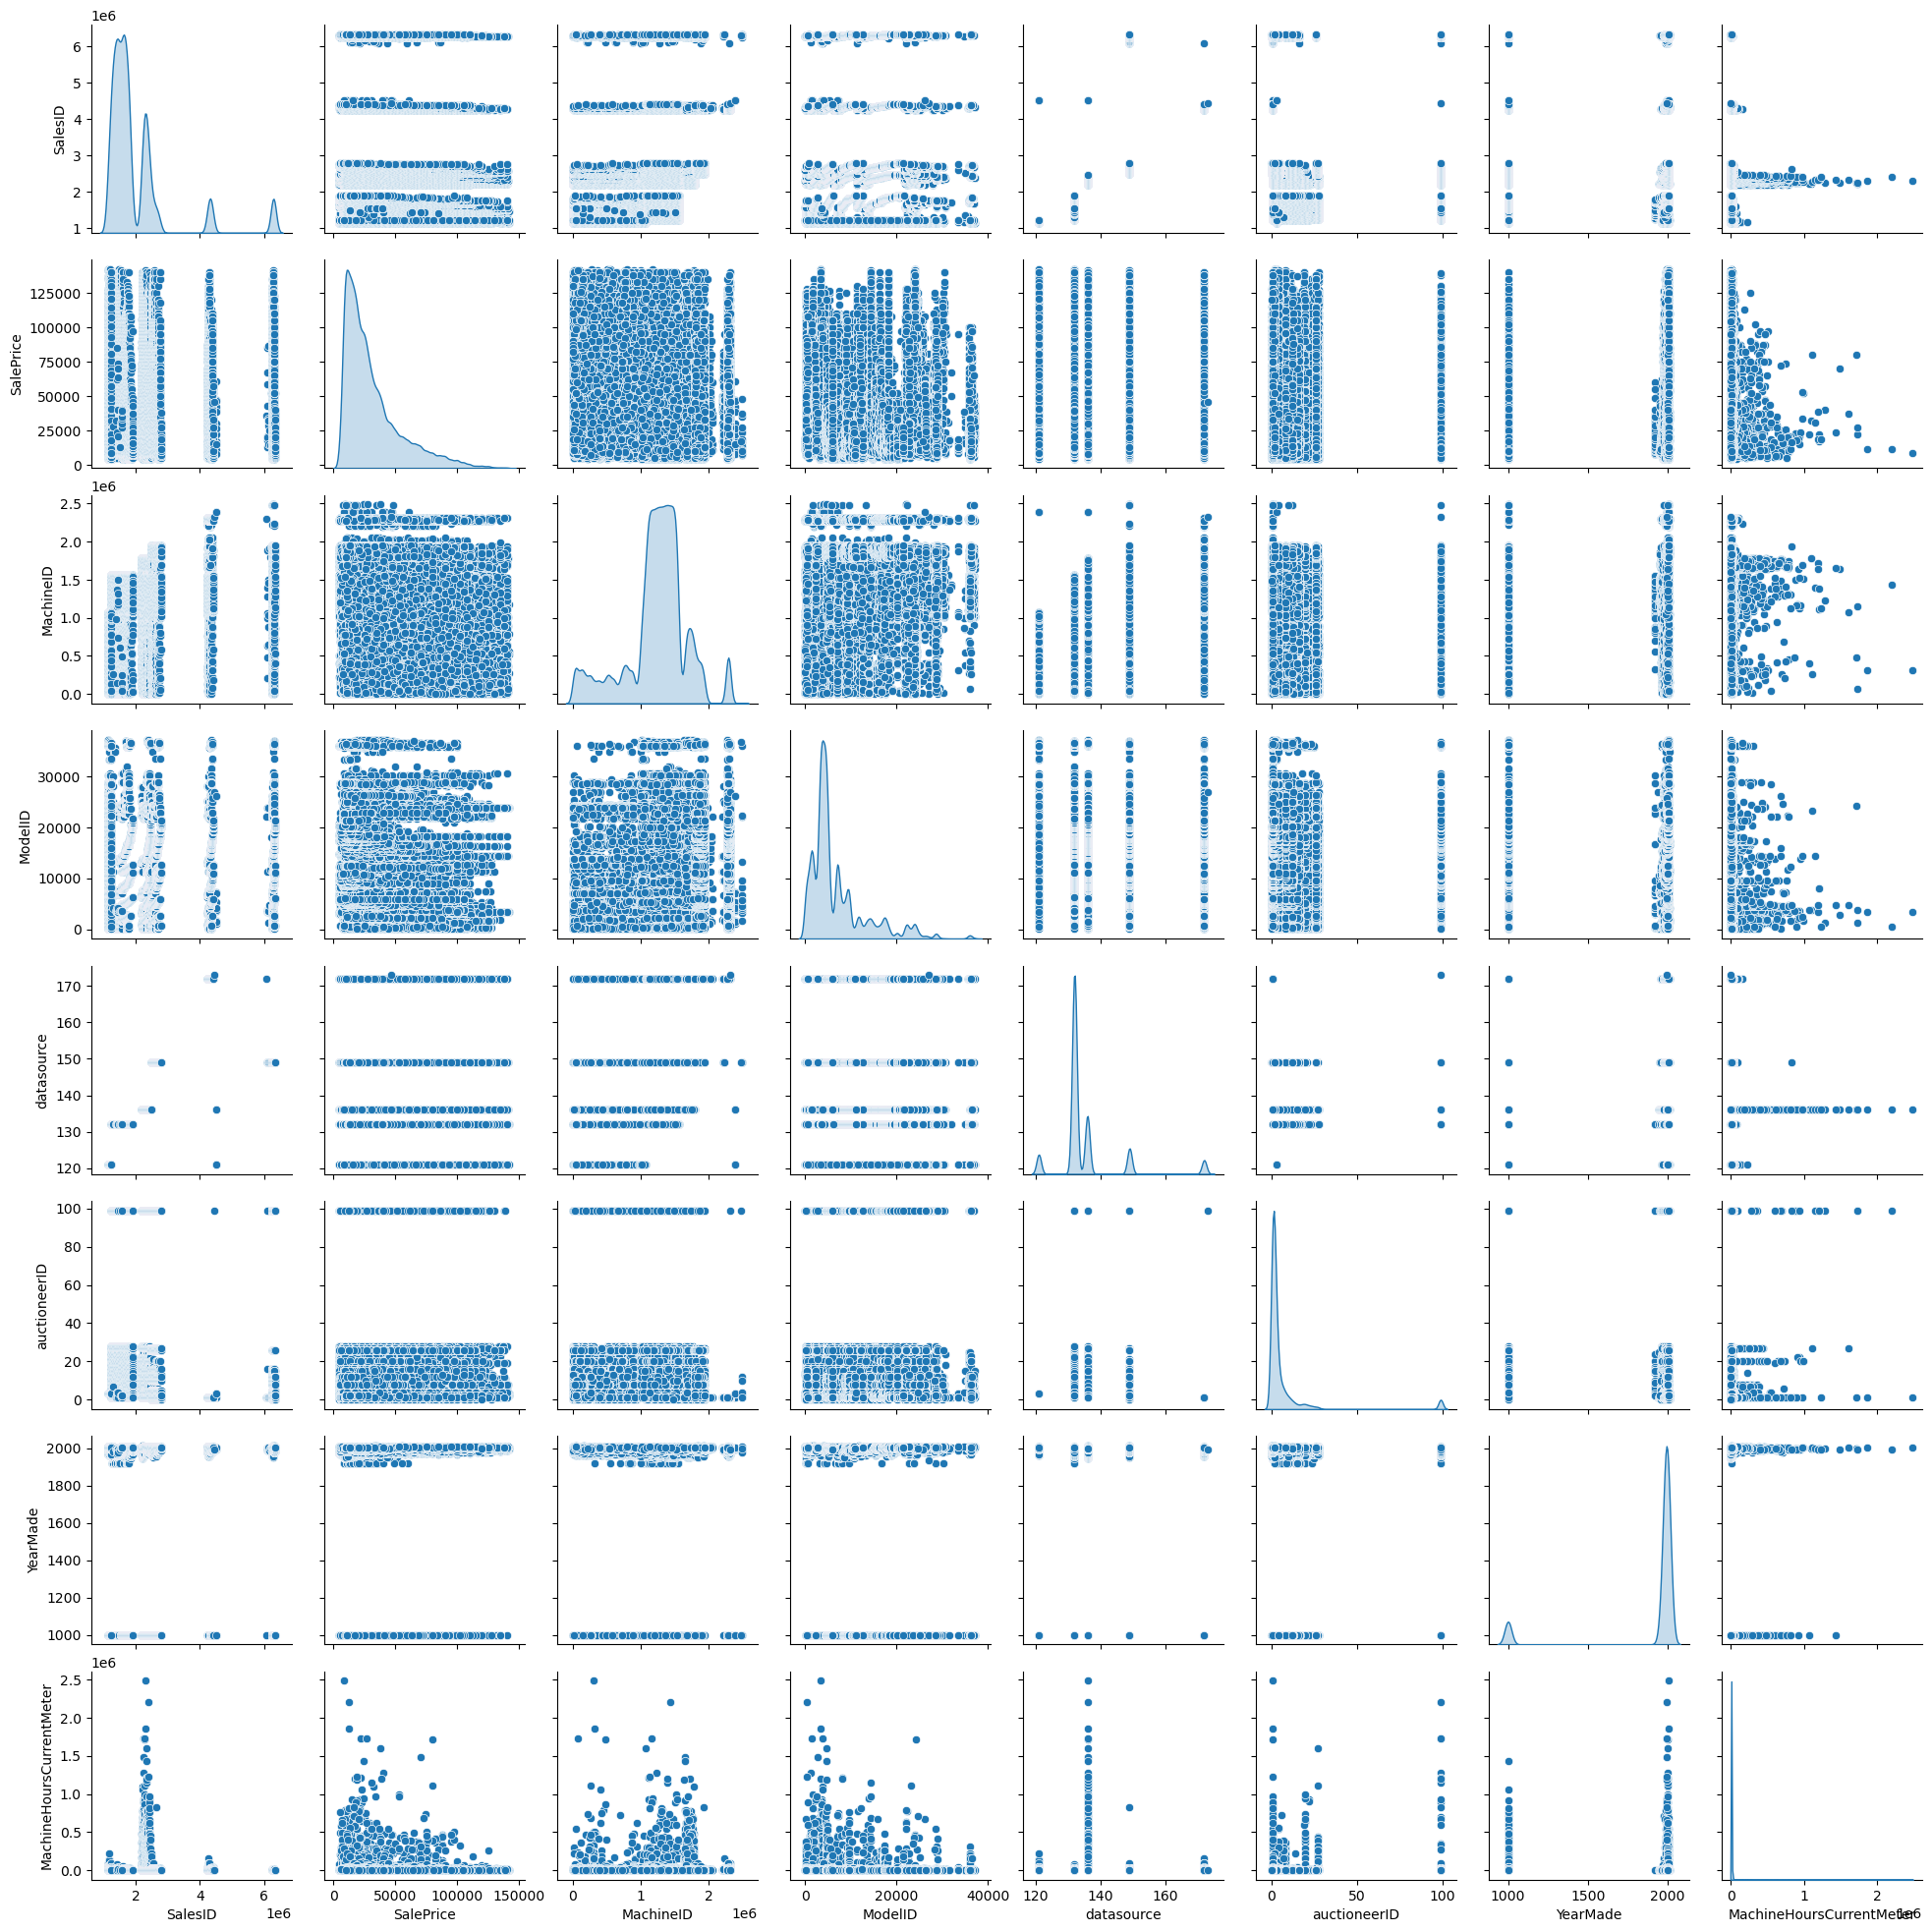

In [36]:
sns.pairplot(raw_data[raw_data.describe().columns], diag_kind='kde')
plt.show()

In [37]:
corr_matrix_dataframe(raw_data[raw_data.describe().columns])

correlation
datasource               SalesID          0.768909
                         MachineID        0.375914
MachineID                SalesID          0.310149
                         SalePrice        0.216841
ModelID                  MachineID        0.165140
YearMade                 SalePrice        0.154389
ModelID                  SalesID          0.147883
datasource               ModelID          0.097704
YearMade                 datasource       0.070933
                         MachineID        0.052118
auctioneerID             SalePrice        0.048350
YearMade                 ModelID          0.045511
ModelID                  SalePrice        0.038063
MachineHoursCurrentMeter auctioneerID     0.030911
SalePrice                SalesID          0.023119
datasource               SalePrice        0.021708
YearMade                 auctioneerID     0.019037
auctioneerID             datasource       0.019021
                         ModelID          0.017852
MachineHoursCurrentMeter SalePrice        0.015660
                         YearMade         0.011598
                         datasource       0.009747
                         SalesID          0.007377
                         ModelID          0.006736
auctioneerID             MachineID        0.005946
YearMade                 SalesID          0.005316
auctioneerID             SalesID          0.003298
MachineHoursCurrentMeter MachineID        0.001149

Unfortunately, we can't say there is any kind of correlation between numerical features, other than between *SaleID* and *datasource*

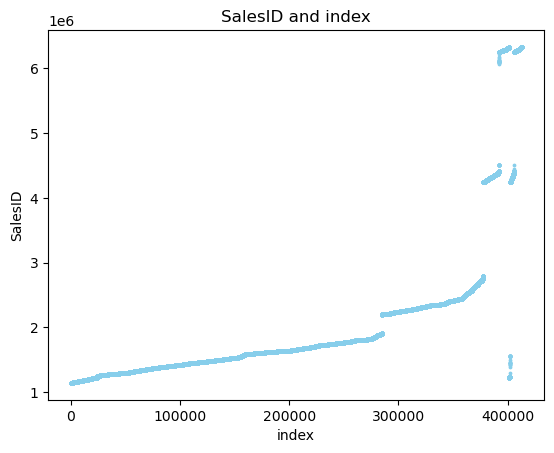

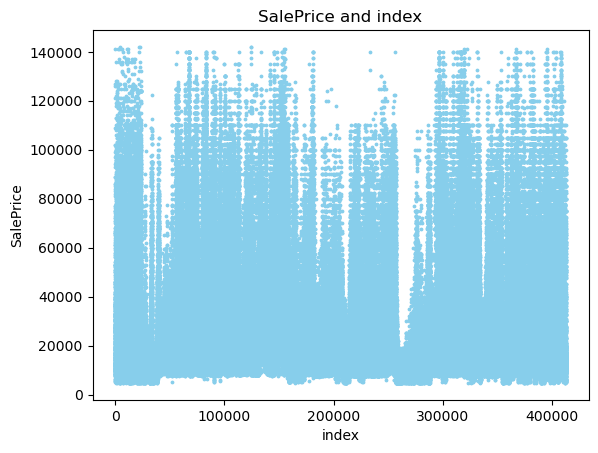

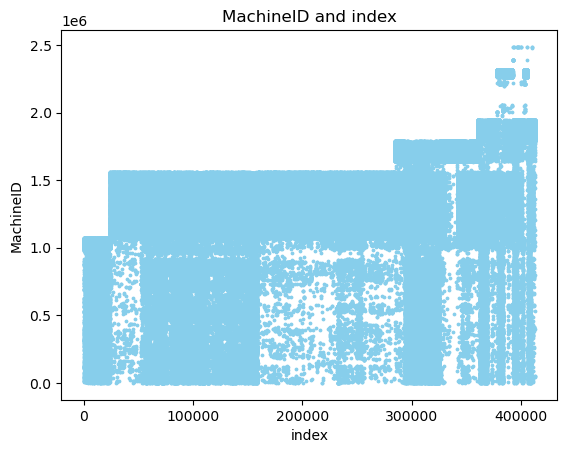

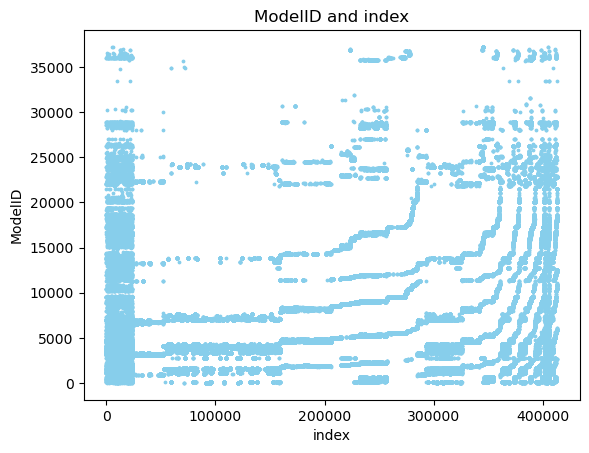

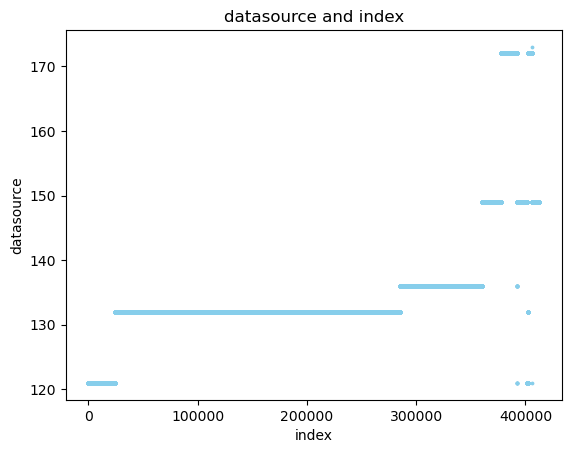

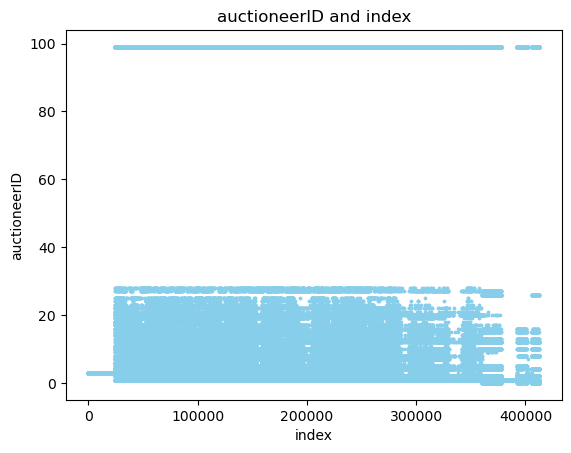

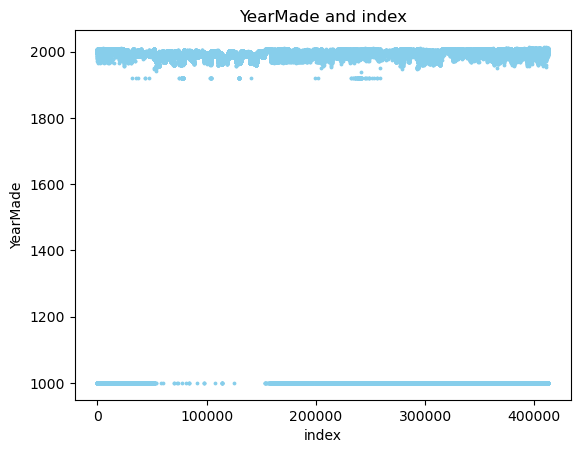

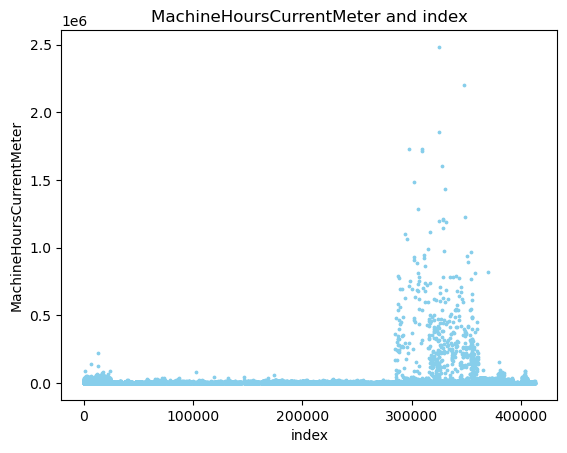

In [38]:
for feature in num_cols:
    plt.scatter(raw_data.index, raw_data[feature], c='skyblue', s=3)
    plt.xlabel("index")
    plt.ylabel(feature)
    plt.title(f"{feature} and index")
    plt.show()

We can have some logical conclusions here:
- Features like *SalesID* and *datasource* display some kind of linear trend with indices, which makes sense, as they should increase with every next purchase
- *ModelID* and *MachineID* seem to have one too, but it is denser - it comes from the fact, that some Buldozers are similar, so they have ID's next to each other
- *auctionerID* are stable at horizontal lines, as people who buy buldozers tend to repeat
- In the rest, there is no relation to the number of index

___
# ***Cleaning*** and ***Preprocessing***
___

### Cleaning

In [39]:
columns_to_terminate = null_to_exterminate.index
raw_data = raw_data.drop(columns=columns_to_terminate, axis=1) # Remove cols with a lot of nulls

raw_data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'saledate', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Enclosure', 'Hydraulics'],
      dtype='object')

In [40]:
raw_data.dtypes

SalesID                 int64
SalePrice             float64
MachineID               int64
ModelID                 int64
datasource              int64
auctioneerID          float64
YearMade                int64
saledate               object
fiModelDesc            object
fiBaseModel            object
fiSecondaryDesc        object
fiProductClassDesc     object
state                  object
ProductGroup           object
ProductGroupDesc       object
Enclosure              object
Hydraulics             object
dtype: object

In [41]:
for column in raw_data.columns: # Replacing ['None or Unspecified','#NAME?'] to nan
    raw_data[column] = raw_data[column].map(lambda x: np.nan if x in ['None or Unspecified','#NAME?'] else x)

for column in raw_data.columns: # Checking if ['None or Unspecified','#NAME?'] were replaced to nan
    if raw_data[column].dtype == 'object':  # Check if the column is categorical
        unique_values = raw_data[column].unique()
        if 'None or Unspecified' in unique_values or '#NAME?' in unique_values:
            print('replacing failed')


In [42]:
nulls_percentage_after = raw_data.isnull().mean() * 100
print('Percentage of nulls in each feature')
nulls_percentage_after

Percentage of nulls in each feature


SalesID                0.000000
SalePrice              0.000000
MachineID              0.000000
ModelID                0.000000
datasource             0.000000
auctioneerID           4.879113
YearMade               0.000000
saledate               0.000000
fiModelDesc            0.000000
fiBaseModel            0.000000
fiSecondaryDesc       34.102661
fiProductClassDesc     0.000000
state                  0.000000
ProductGroup           0.000000
ProductGroupDesc       0.000000
Enclosure              0.081415
Hydraulics            20.008578
dtype: float64

In [43]:
raw_data['saledate'] = pd.to_datetime(raw_data['saledate'])
raw_data['saledate'].dtype

dtype('<M8[ns]')

In [44]:
raw_data['YearOfSale'] = raw_data['saledate'].dt.year
raw_data['MonthOfSale'] = raw_data['saledate'].dt.month
raw_data['DayOfSale'] = raw_data['saledate'].dt.day
raw_data

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade   saledate fiModelDesc fiBaseModel fiSecondaryDesc  \
0           2004 2006-11-16        521D         521               D   
1           1996 2004-03-26      950FII         950               F   
2           2001 2004-02-26         226         226             NaN   
3           2001 2011-05-19    PC120-6E       PC120             NaN   
4           2007 2009-07-23        S175        S175             NaN   
...          ...        ...         ...         ...             ...   
412693      2005 2012-03-07        30NX          30              NX   
412694      2005 2012-01-28       30NX2          30              NX   
412695      2005 2012-01-28        30NX          30              NX   
412696      2006 2012-03-07        30NX          30              NX   
412697      2006 2012-01-28       30NX2          30              NX   

                                       fiProductClassDesc           state  \
0                Wheel Loader - 110.0 to 120.0 Horsepower         Alabama   
1                Wheel Loader - 150.0 to 175.0 Horsepower  North Carolina   
2       Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...        New York   
3       Hydraulic Excavator, Track - 12.0 to 14.0 Metr...           Texas   
4       Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...        New York   
...                                                   ...             ...   
412693  Hydraulic Excavator, Track - 2.0 to 3.0 Metric...           Texas   
412694  Hydraulic Excavator, Track - 3.0 to 4.0 Metric...         Florida   
412695  Hydraulic Excavator, Track - 2.0 to 3.0 Metric...         Florida   
412696  Hydraulic Excavator, Track - 2.0 to 3.0 Metric...           Texas   
412697  Hydraulic Excavator, Track - 3.0 to 4.0 Metric...         Florida   

       ProductGroup    ProductGroupDesc   Enclosure Hydraulics  YearOfSale  \
0                WL        Wheel Loader  EROPS w AC    2 Valve        2006   
1                WL        Wheel Loader  EROPS w AC    2 Valve        2004   
2               SSL  Skid Steer Loaders       OROPS  Auxiliary        2004   
3               TEX    Track Excavators  EROPS w AC    2 Valve        2011   
4               SSL  Skid Steer Loaders       EROPS  Auxiliary        2009   
...             ...                 ...         ...        ...         ...   
412693          TEX    Track Excavators       EROPS   Standard        2012   
412694          TEX    Track Excavators       EROPS  Auxiliary        2012   
412695          TEX    Track Excavators       EROPS  Auxiliary        2012   
412696          TEX    Track Excavators       EROPS  Auxiliary        2012   
412697          TEX    Track Excavators       EROPS  Auxiliary        2012   

        MonthOfSale  DayOfSale  
0                11         16  
1                 3         26  
2                 2         26  
3                 5         19  
4                 7         23  
...             ...        ...  
412693            3          7  
412694            1         28  
412695            1         28  
412696            3          7  
412697           

In [45]:
data_cleaning = make_pipeline(
    DropColumnTransformer(columns=["saledate"]),
    FunctionTransformer(lambda X: X.drop_duplicates(), validate=False),
    CustomOutlierRemover(),
)

df_cleaned = data_cleaning.fit_transform(raw_data)
df_cleaned.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

  fiModelDesc fiBaseModel fiSecondaryDesc  \
0        521D         521               D   
1      950FII         950               F   
2         226         226             NaN   
3    PC120-6E       PC120             NaN   
4        S175        S175             NaN   

                                  fiProductClassDesc           state  \
0           Wheel Loader - 110.0 to 120.0 Horsepower         Alabama   
1           Wheel Loader - 150.0 to 175.0 Horsepower  North Carolina   
2  Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...        New York   
3  Hydraulic Excavator, Track - 12.0 to 14.0 Metr...           Texas   
4  Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...        New York   

  ProductGroup    ProductGroupDesc   Enclosure Hydraulics  YearOfSale  \
0           WL        Wheel Loader  EROPS w AC    2 Valve        2006   
1           WL        Wheel Loader  EROPS w AC    2 Valve        2004   
2          SSL  Skid Steer Loaders       OROPS  Auxiliary        2004   
3          TEX    Track Excavators  EROPS w AC    2 Valve        2011   
4          SSL  Skid Steer Loaders       EROPS  Auxiliary        2009   

   MonthOfSale  DayOfSale  
0           11         16  
1            3         26  
2            2         26  
3            5         19  
4            7         23

### Preprocessing

In [46]:
preprocessing_pipeline = make_pipeline(
   CustomCategoryDivider(column = 'fiProductClassDesc'),
   CustomWhitespaceRemover(columns=['fiSecondaryDesc', 'fiBaseModel', 'fiModelDesc']),
   NaNIndicator(columns=['auctioneerID', 'fiSecondaryDesc', 'Enclosure']),
   CustomOrdinalEncoder(columns=['fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'state'], handling_missing='use_encoded_value'),
   CustomOneHotEncoder(columns=['ProductGroup', 'ProductGroupDesc', 'Enclosure', 'Hydraulics', 'Wheel Loader', 'Skid Steer Loader',
       'Hydraulic Excavator, Track', 'Backhoe Loader',
       'Track Type Tractor, Dozer', 'Motorgrader'], handling_missing='ignore'),
   CustomMinMaxScaler(columns=['YearMade']),
   CustomImputer(strategy='most_frequent', columns=['auctioneerID'])
)
df_preprocessed = preprocessing_pipeline.fit_transform(df_cleaned)
df_preprocessed.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0  0.913978   
1  1139248    57000.0     117657       77         121           3.0  0.827957   
2  1139249    10000.0     434808     7009         121           3.0  0.881720   
3  1139251    38500.0    1026470      332         121           3.0  0.881720   
4  1139253    11000.0    1057373    17311         121           3.0  0.946237   

   fiModelDesc  fiBaseModel  fiSecondaryDesc  ...  \
0        842.0        278.0             25.0  ...   
1       1524.0        485.0             37.0  ...   
2        289.0        105.0            131.0  ...   
3       3055.0       1187.0            131.0  ...   
4       3407.0       1302.0            131.0  ...   

   Track Type Tractor, Dozer_75.0 to 85.0 Horsepower  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Track Type Tractor, Dozer_85.0 to 105.0 Horsepower  \
0                                                0.0    
1                                                0.0    
2                                                0.0    
3                                                0.0    
4                                                0.0    

   Track Type Tractor, Dozer_Unidentified  Track Type Tractor, Dozer_nan  \
0                                     0.0                            1.0   
1                                     0.0                            1.0   
2                                     0.0                            1.0   
3                                     0.0                            1.0   
4                                     0.0                            1.0   

   Motorgrader_130.0 to 145.0 Horsepower  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Motorgrader_145.0 to 170.0 Horsepower  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Motorgrader_170.0 to 200.0 Horsepower  Motorgrader_200.0 + Horsepower  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             0.0   

   Motorgrader_45.0 to 130.0 Horsepower  Motorgrader_nan  
0                                   0.0              1.0  
1                                   0.0              1.0  
2                                   0.0              1.0  
3                                   0.0              1.0  
4                                   0.0              1.0  

[5 rows x 125 columns]

In [47]:
unique_column_content_check(df_preprocessed)

{}

In [48]:
print(*df_preprocessed.columns)

SalesID SalePrice MachineID ModelID datasource auctioneerID YearMade fiModelDesc fiBaseModel fiSecondaryDesc state YearOfSale MonthOfSale DayOfSale auctioneerID_missing fiSecondaryDesc_missing Enclosure_missing ProductGroup_BL ProductGroup_MG ProductGroup_SSL ProductGroup_TEX ProductGroup_TTT ProductGroup_WL ProductGroupDesc_Backhoe Loaders ProductGroupDesc_Motor Graders ProductGroupDesc_Skid Steer Loaders ProductGroupDesc_Track Excavators ProductGroupDesc_Track Type Tractors ProductGroupDesc_Wheel Loader Enclosure_EROPS Enclosure_EROPS AC Enclosure_EROPS w AC Enclosure_NO ROPS Enclosure_OROPS Enclosure_nan Hydraulics_2 Valve Hydraulics_3 Valve Hydraulics_4 Valve Hydraulics_Auxiliary Hydraulics_Base + 1 Function Hydraulics_Base + 2 Function Hydraulics_Base + 3 Function Hydraulics_Base + 4 Function Hydraulics_Base + 5 Function Hydraulics_Base + 6 Function Hydraulics_Standard Hydraulics_nan Wheel Loader_0.0 to 40.0 Horsepower Wheel Loader_100.0 to 110.0 Horsepower Wheel Loader_1000.0 + H

___
# ***EDA*** After Cleaning
___

During cleaning we changed the feature *saledate* into numerical values and put them as three features - 
*YearOfSale*, *MonthOfSale*, *DayOfSale*.

If they give some results during the numerical analysis, we will mention them.

In [49]:
df_cleaned.describe()

SalesID      SalePrice     MachineID        ModelID  \
count  3.317440e+05  331744.000000  3.317440e+05  331744.000000   
mean   1.707018e+06   30799.533538  1.181643e+06    6279.146502   
std    4.088224e+05   20906.709041  4.123016e+05    5268.273696   
min    1.139246e+06    4750.000000  0.000000e+00      28.000000   
25%    1.398804e+06   15000.000000  1.083197e+06    3247.000000   
50%    1.607316e+06   25000.000000  1.265461e+06    4602.000000   
75%    1.841926e+06   40000.000000  1.445311e+06    7511.000000   
max    4.512895e+06  100500.000000  2.386738e+06   25730.000000   

          datasource   auctioneerID       YearMade     YearOfSale  \
count  331744.000000  314792.000000  331744.000000  331744.000000   
mean      132.912637       6.728608    1993.228884    2003.517553   
std         4.792209      17.201215       9.689249       5.792784   
min       121.000000       0.000000    1919.000000    1989.000000   
25%       132.000000       1.000000    1987.000000    2000.000000   
50%       132.000000       2.000000    1996.000000    2005.000000   
75%       132.000000       4.000000    2000.000000    2008.000000   
max       149.000000      99.000000    2012.000000    2012.000000   

         MonthOfSale      DayOfSale  
count  331744.000000  331744.000000  
mean        6.311177      16.064209  
std         3.420490       8.467840  
min         1.000000       1.000000  
25%         3.000000       9.000000  
50%         6.000000      16.000000  
75%         9.000000      23.000000  
max        12.000000      31.000000

In [50]:
unique_column_content_check(df_cleaned)

{'fiModelDesc': (array(['521D', '950FII', '226', ..., 'WA430-6', 'G960', '1CX'],
        dtype=object),
  4028),
 'fiBaseModel': (array(['521', '950', '226', ..., 'WA430', 'G960', '1CX'], dtype=object),
  1658),
 'fiSecondaryDesc': (array(['D', 'F', nan, 'G', 'E', 'NX', 'SUPER K', 'STD', 'B', 'BL', 'C',
         'XT', 'H', 'MR', 'L', 'M', 'J', 'SE', 'SXT', 'HD', 'Z', 'SUPER M',
         'LX', 'SUPER L', 'LE', 'K', 'A', 'S', 'P', 'SG', 'LC', 'PX', 'N',
         'UU', 'XL', 'MXT', 'EX', 'R', 'LCM', 'PT', 'TM', 'HZ', 'DXT', 'US',
         '3', 'SR', '7', 'ZTS', 'B     ', 'UR', '-3', 'V', 'ZT', 'AX',
         'SUPER M PLUS', 'BZD', 'DZ', 'WD', 'T', 'CH', 'CS', 'ZHS G', 'Q',
         'FR', 'SUPER E', 'UNA', 'PS', 'NE', 'U', 'GT', '2', 'URG', 'SB',
         'TX', 'TTL', 'JX', 'MSR SPIN ACE', 'HF', 'X', 'EST', 'LR', 'TC',
         'USR', 'SJ', 'SUPER LE', 'ZF', 'MT', 'SUPER R', 'C      ', 'BEC',
         'CE', 'AB', 'MU', 'USRK', 'W', 'SL', 'SU', '0.7', 'THF', 'ZX',
         'NL', 'CX', 'SRLC

In [51]:
print("\nSummary statistics for categorical variables of cleaned data:")
for column in df_cleaned.select_dtypes(include=['object']).columns:
    series_1 = pd.Series(data=raw_data[column].value_counts().values,
                     index=raw_data[column].value_counts().index,
                     name=f'{column}_raw')

    series_2 = pd.Series(data=df_cleaned[column].value_counts().values,
                        index=df_cleaned[column].value_counts().index,
                        name=f'{column}_cleaned')

    merged_df = pd.DataFrame({
        f'{column}_raw': series_1,
        f'{column}_cleaned': series_2
    }).reset_index(drop=True)
    merged_df.index = series_1.index.union(series_2.index)
    print(merged_df)


Summary statistics for categorical variables of cleaned data:
             fiModelDesc_raw  fiModelDesc_cleaned
fiModelDesc                                      
100C                      17                 13.0
104                        1                  1.0
1066                      18                 16.0
1066E                      1                  NaN
1080                      44                 42.0
...                      ...                  ...
ZX80                      11                  8.0
ZX800                     12                  9.0
ZX800LC                    3                  2.0
ZX80LCK                    2                  NaN
ZX850H                     2                  2.0

[5059 rows x 2 columns]
             fiBaseModel_raw  fiBaseModel_cleaned
fiBaseModel                                      
10                        72                 53.0
100                       17                 13.0
104                        1                  1.0
1066        

We can clearly see, that cleaned data indeed has less data in each feature and each category.

We only showed categorical features that were not gotten rid of, so that means that there were outliers and duplicated rows, which have been eliminated during cleaning.

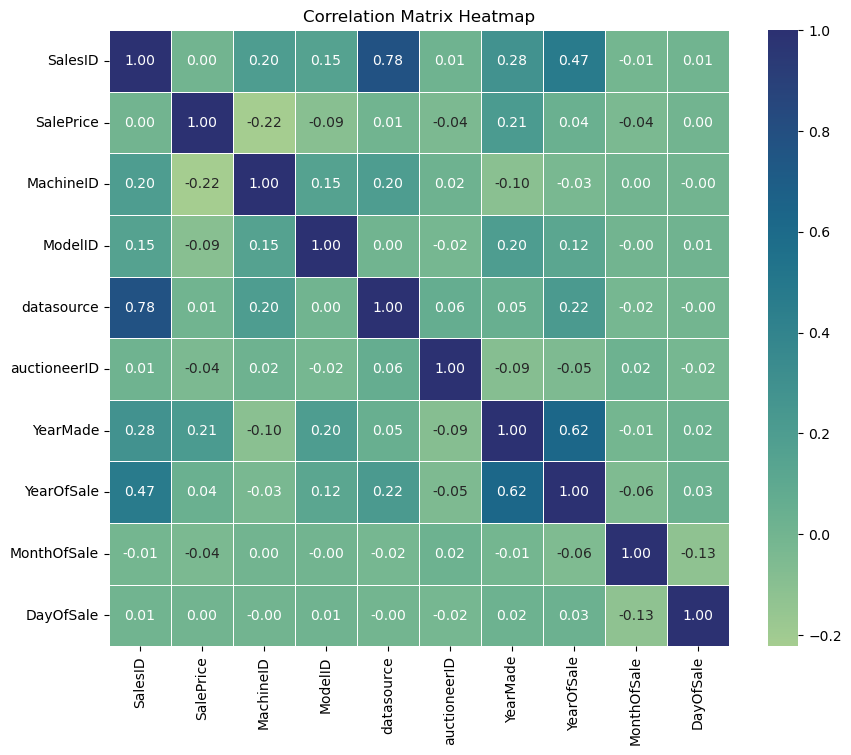

In [52]:
num_cols_cleaned = df_cleaned.describe().columns

correlation_matrix = df_cleaned[num_cols_cleaned].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidth=.5, fmt='.2f', cmap='crest')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [53]:
corr_matrix_dataframe(df_cleaned[num_cols_cleaned])

correlation
datasource   SalesID          0.775258
YearOfSale   YearMade         0.624090
             SalesID          0.467160
YearMade     SalesID          0.283908
MachineID    SalePrice        0.221965
YearOfSale   datasource       0.220240
YearMade     SalePrice        0.213231
             ModelID          0.199975
MachineID    SalesID          0.196791
datasource   MachineID        0.195539
ModelID      MachineID        0.152502
             SalesID          0.151271
DayOfSale    MonthOfSale      0.125763
YearOfSale   ModelID          0.118387
YearMade     MachineID        0.104444
ModelID      SalePrice        0.093793
YearMade     auctioneerID     0.085006
auctioneerID datasource       0.060010
MonthOfSale  YearOfSale       0.058230
YearOfSale   auctioneerID     0.053589
YearMade     datasource       0.049900
auctioneerID SalePrice        0.044322
MonthOfSale  SalePrice        0.036961
YearOfSale   SalePrice        0.036345
             MachineID        0.033273
DayOfSale    YearOfSale       0.029495
             YearMade         0.023461
MonthOfSale  auctioneerID     0.022047
auctioneerID ModelID          0.021244
             MachineID        0.020432
DayOfSale    auctioneerID     0.020127
MonthOfSale  datasource       0.019159
auctioneerID SalesID          0.012622
DayOfSale    ModelID          0.010453
MonthOfSale  SalesID          0.008176
             YearMade         0.007802
DayOfSale    SalesID          0.006898
datasource   SalePrice        0.006339
             ModelID          0.004824
DayOfSale    datasource       0.004235
             MachineID        0.002142
             SalePrice        0.002024
SalePrice    SalesID          0.001805
MonthOfSale  MachineID        0.001486
             ModelID          0.000203

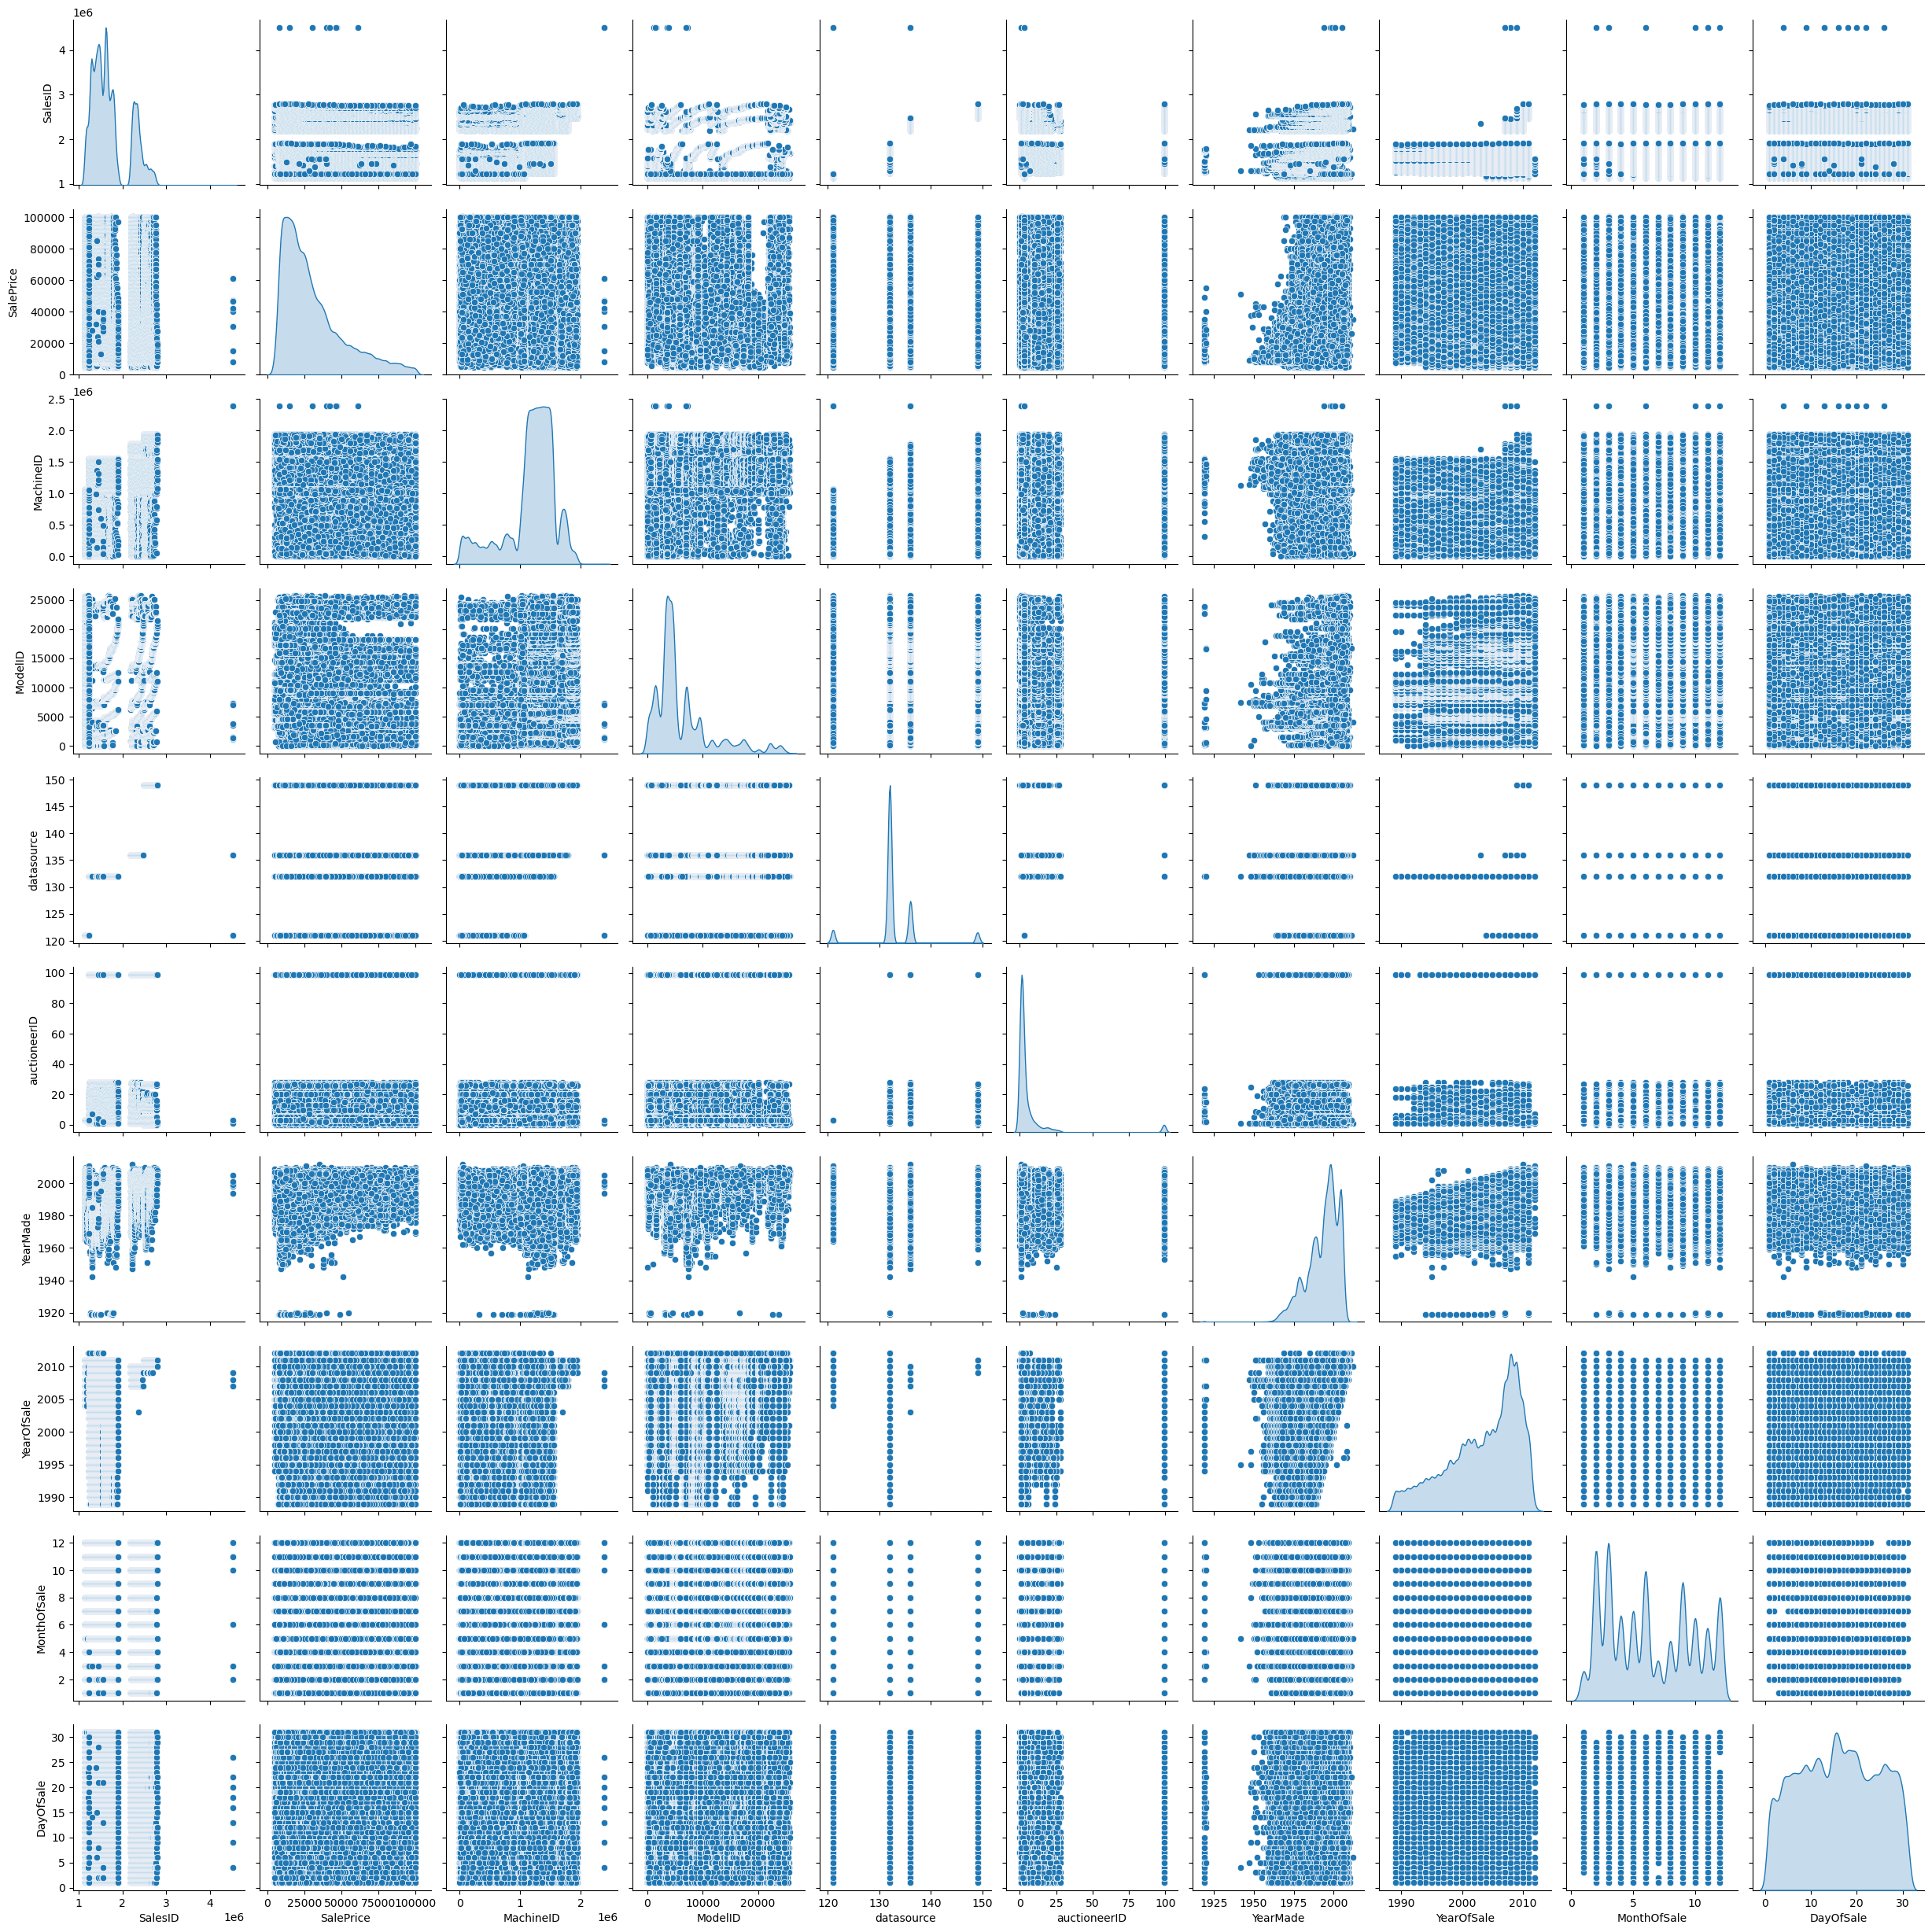

In [54]:
sns.pairplot(df_cleaned[num_cols_cleaned], diag_kind='kde')
plt.show()

This time the results of correlations haven't changed much, however we can now see some correlation between *YearOfSale* and *YearMade*, other than *datasource* and *SalesID*

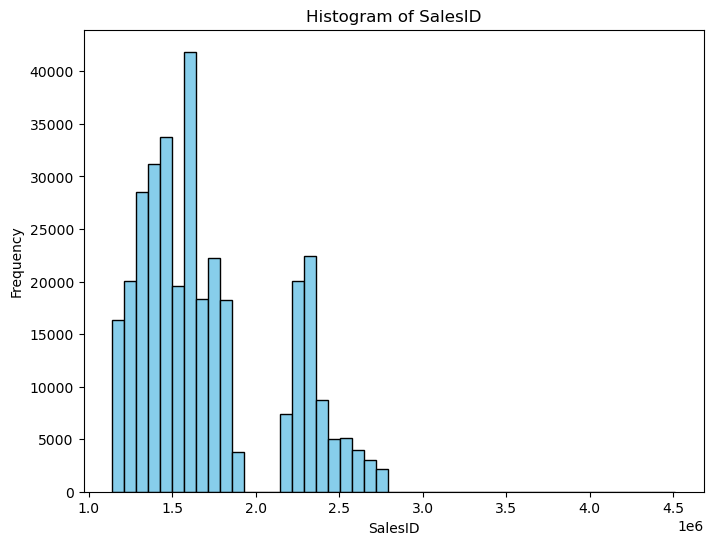

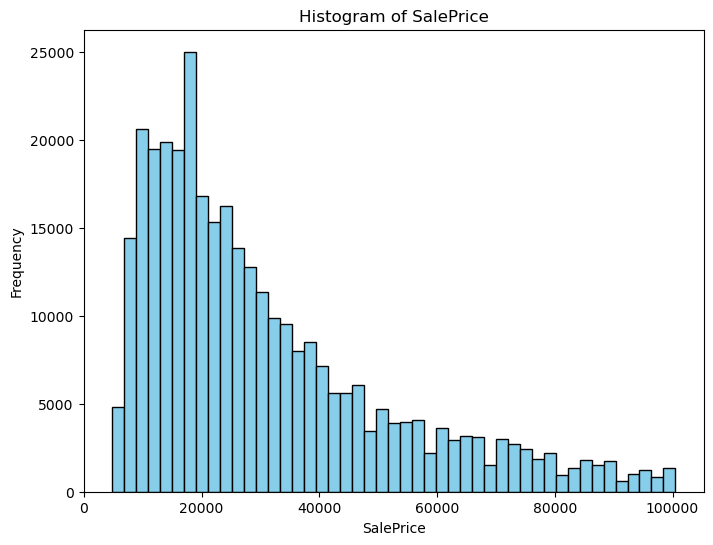

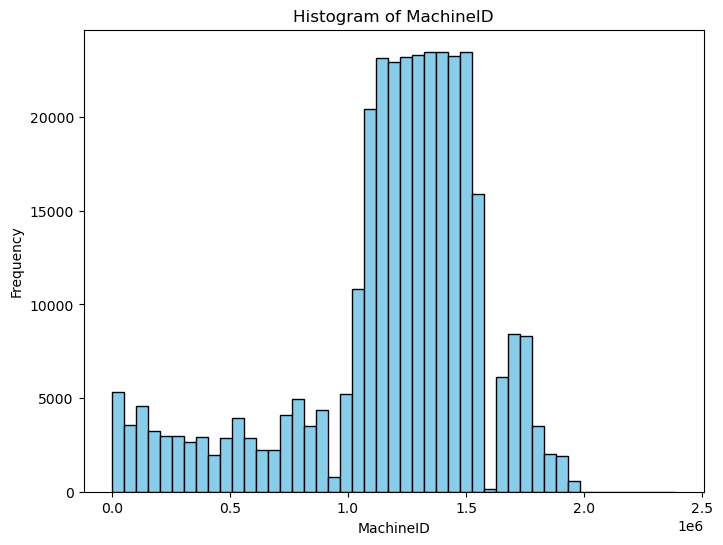

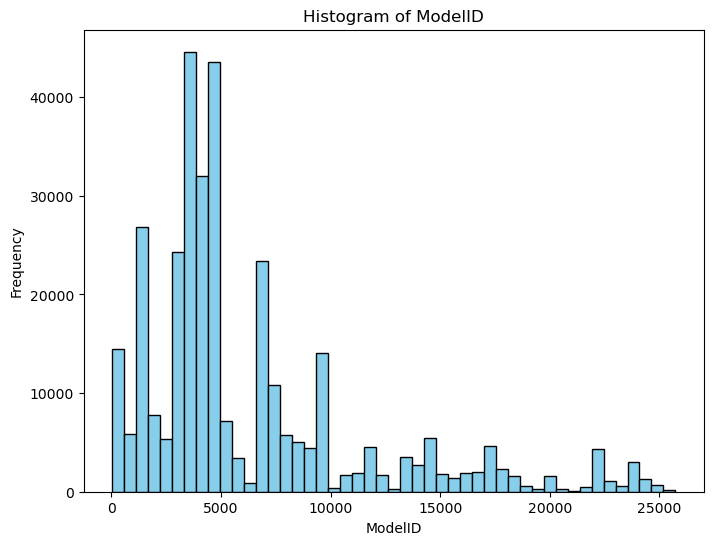

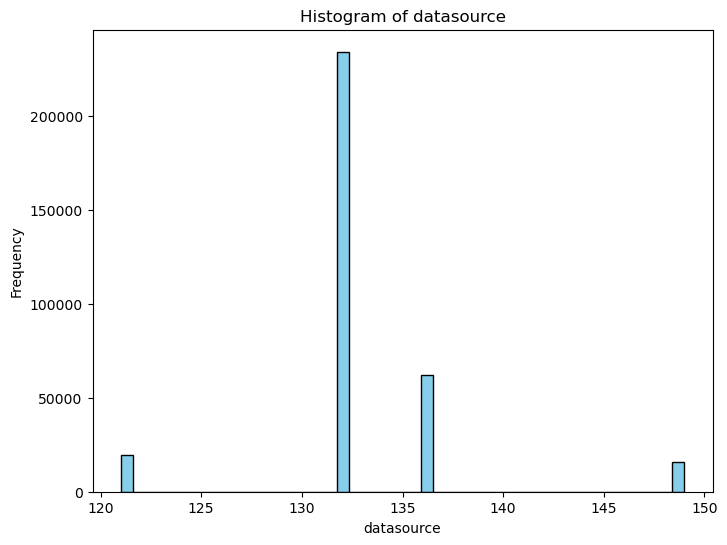

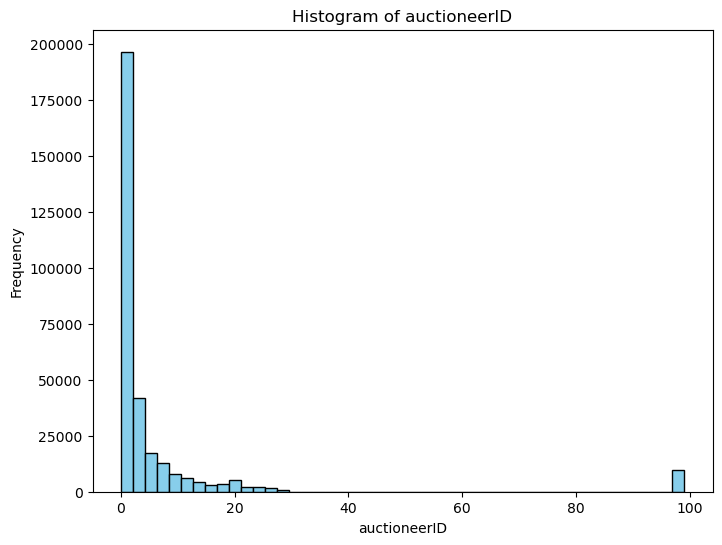

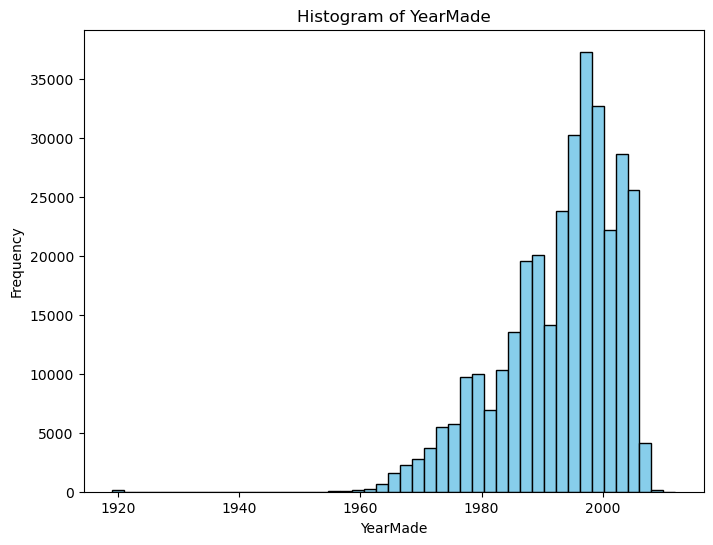

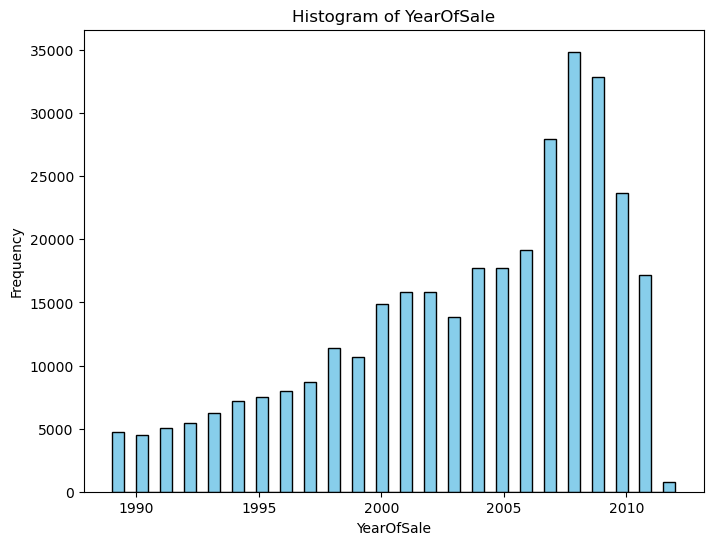

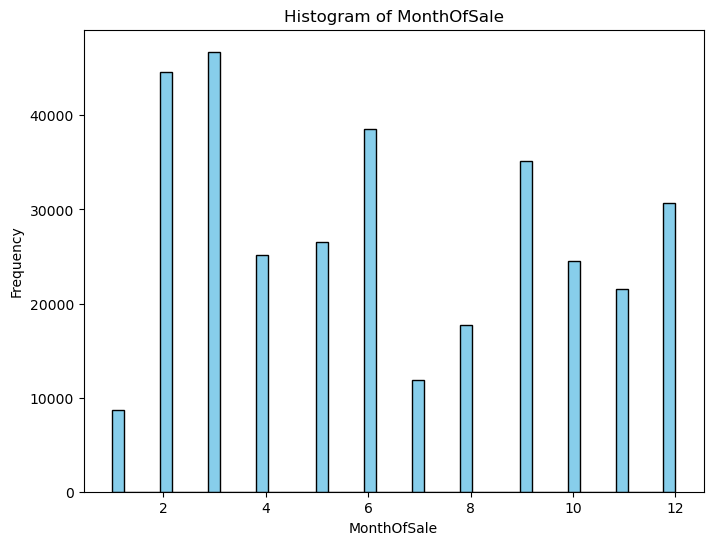

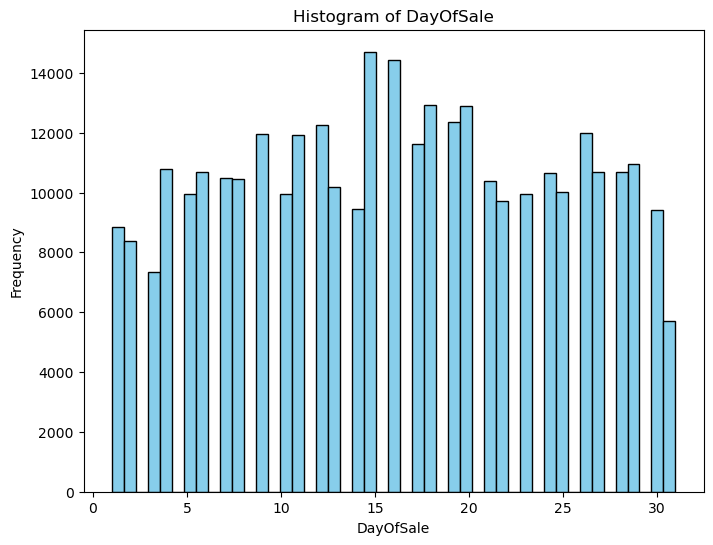

In [55]:
for var in num_cols_cleaned:
    plt.figure(figsize=(8, 6))
    plt.hist(df_cleaned[var], bins=len(df_cleaned[var])//7000, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

After getting rid of outliers we can see more clearly the distributions of numerical data. Most of them display similarity to the normal distribution.

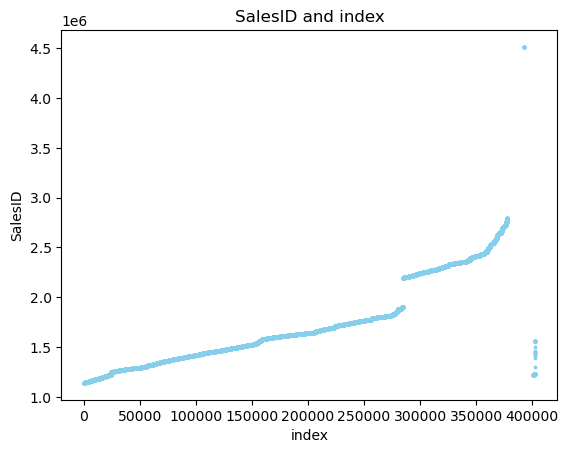

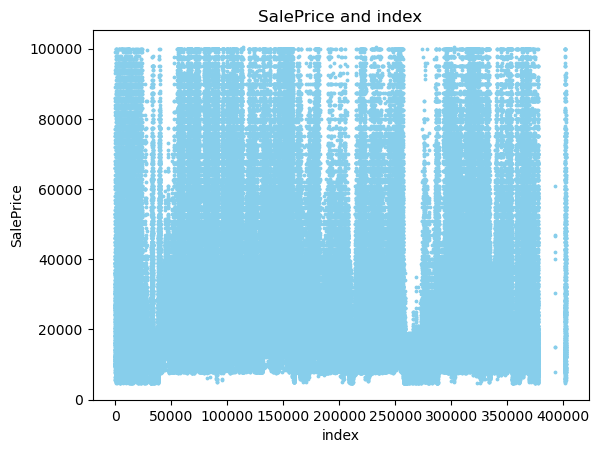

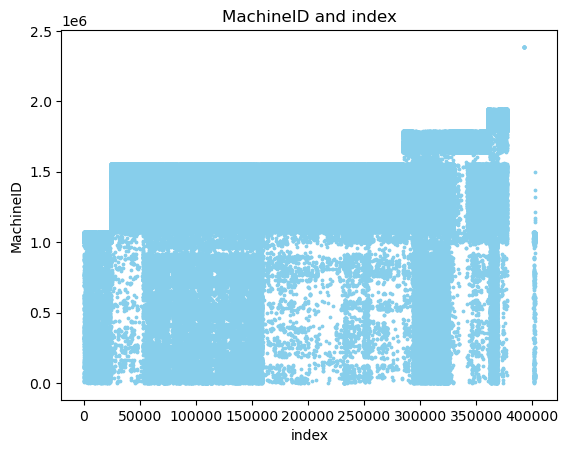

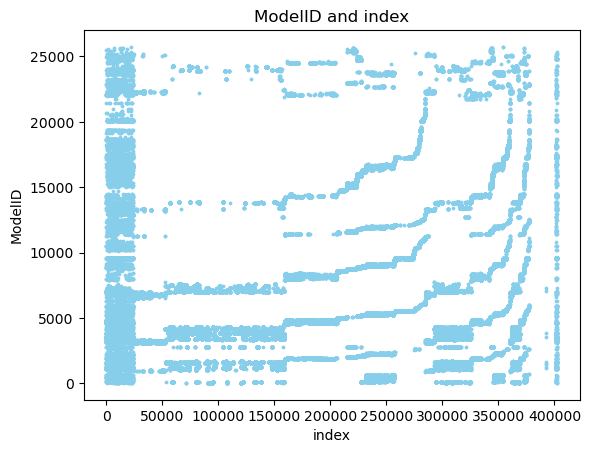

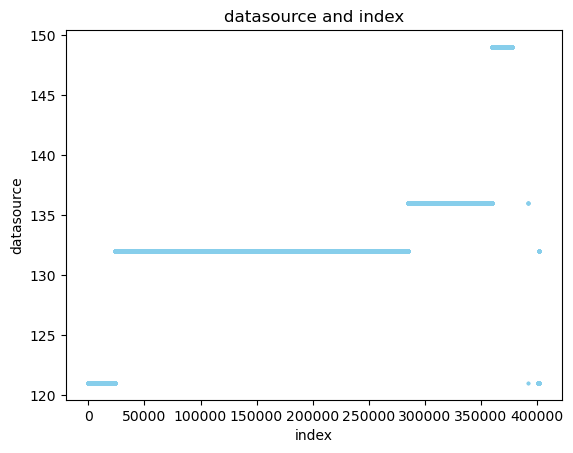

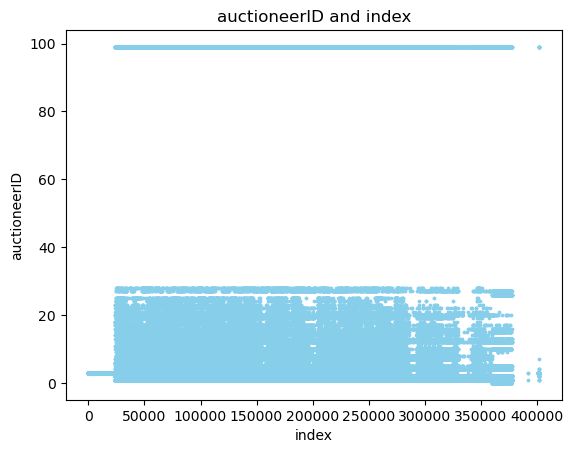

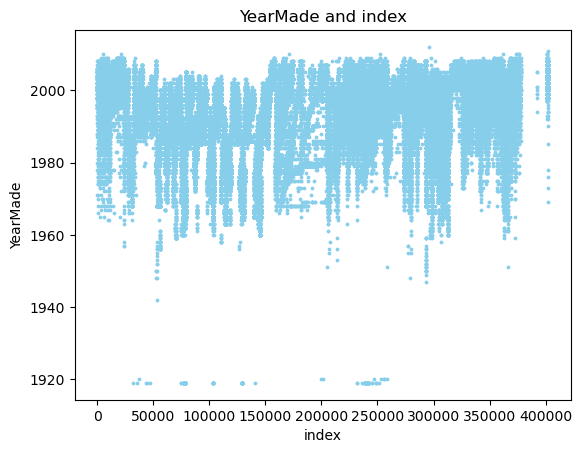

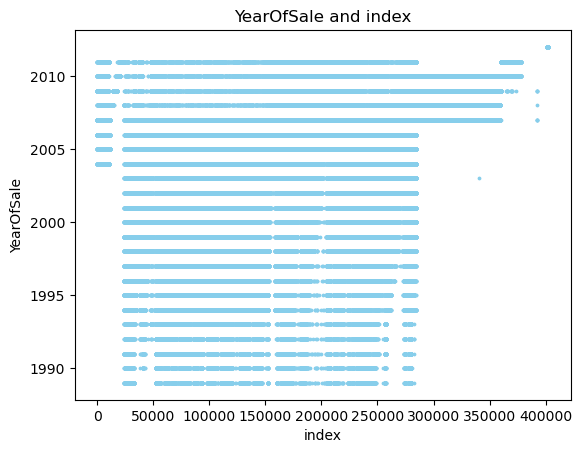

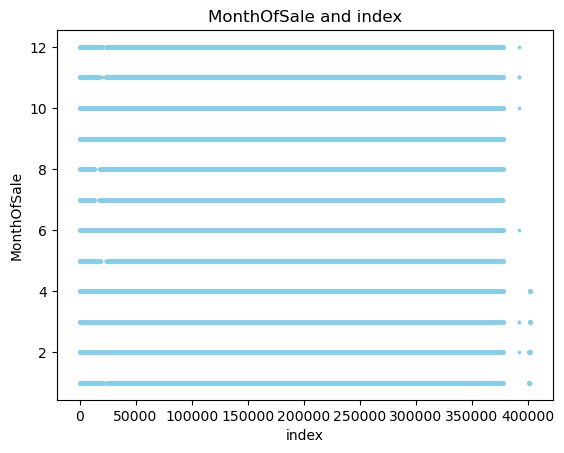

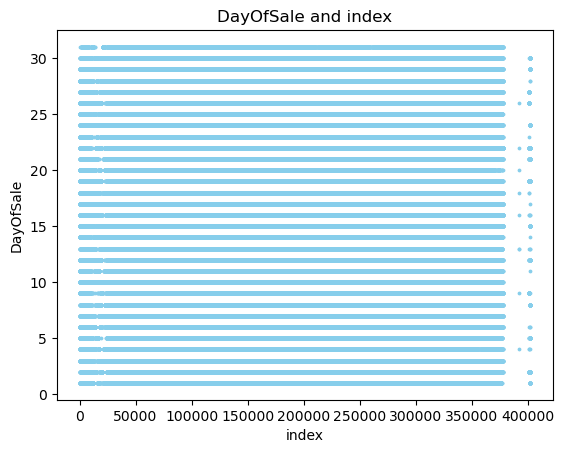

In [56]:
for feature in num_cols_cleaned:
    plt.scatter(df_cleaned.index, df_cleaned[feature], c='skyblue', s=3)
    plt.xlabel("index")
    plt.ylabel(feature)
    plt.title(f"{feature} and index")
    plt.show()

Nothing significant changes when it comes to the relationship between cleaned numerical data and indices.

In [57]:
perform_statistical_tests(['chi2 independence'], df_cleaned, 'SalePrice')


Chi2 independency test for SalesID and SalePrice:
    chi2: 255442880, pvalue: 0.486
    Do we reject independence? False


Chi2 independency test for MachineID and SalePrice:
    chi2: 224176195, pvalue: 0.000
    Do we reject independence? True

    Cramer's V association for MachineID and SalePrice:
    Cramer's V: 0.937


Chi2 independency test for ModelID and SalePrice:
    chi2: 5762637, pvalue: 0.000
    Do we reject independence? True

    Cramer's V association for ModelID and SalePrice:
    Cramer's V: 0.150


Chi2 independency test for datasource and SalePrice:
    chi2: 12097, pvalue: 0.000
    Do we reject independence? True

    Cramer's V association for datasource and SalePrice:
    Cramer's V: 0.110


Chi2 independency test for auctioneerID and SalePrice:
    chi2: 124046, pvalue: 0.000
    Do we reject independence? True

    Cramer's V association for auctioneerID and SalePrice:
    Cramer's V: 0.117


Chi2 independency test for YearMade and SalePrice:
    chi2: 109

When it comes to independency, only SalesID and SalePrice got tested as independent (failed to reject independence).</br></br> Other pairs rejected independence but only a couple of them have Cramer's V association coefficient worth to mention.</br>
</br>MachineID and SalePrice Cramer's V: 0.937 - Almost perfect
</br>ProductGroup and SalePrice Cramer's V: 0.333 - Medium
</br>ProductGroupDesc and SalePrice Cramer's V: 0.333 - Medium
</br>Enclosure and SalePrice Cramer's V: 0.258 - Almost medium
</br></br>So these pairs play a big role for our ML Models

In [58]:
perform_statistical_tests(['ks normality'], df_cleaned, 'SalePrice')


KS normality test for SalesID:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True


KS normality test for SalePrice:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True


KS normality test for MachineID:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True


KS normality test for ModelID:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True


KS normality test for datasource:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True


KS normality test for auctioneerID:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True


KS normality test for YearMade:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True


KS normality test for YearOfSale:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True


KS normality test for MonthOfSale:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True


KS normality test for DayOfSale:
    ks_stat: 1, pvalue: 0.000
    Do we reject normality? True



Every pair above rejected normality, so the distributions are not normally distributed (ideally), nevertheless using our eyes we can clearly see on the graphs in the previous steps, that the distributions resemble left/right skewed normal distributions or variations of them.

___
# ***Regression***
___

### Splitting train and validation

In [59]:
df_train = df_preprocessed[df_preprocessed['YearOfSale'] <= 2011]
df_valid = df_preprocessed[df_preprocessed['YearOfSale'] == 2012]

In [60]:
X_train, y_train = df_train.drop(['SalePrice'], axis=1), df_train['SalePrice']
X_valid, y_valid = df_valid.drop(['SalePrice'], axis=1), df_valid['SalePrice']

In [61]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((330940, 124), (330940,), (804, 124), (804,))

### XGBoost

In [62]:
xgb = XGBRegressor(learning_rate=0.108, max_depth=8, n_estimators=555, subsample=0.8, tree_method='approx')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_valid)

In [63]:
metrics_xgb_valid = calculate_metrics(y_valid, y_pred, 'XGBoost')
metrics_xgb_valid

XGBoost
R^2 Score                                            0.889294
Root Mean Squared Error (RMSE)                    8136.084058
Mean Absolute Percentage Error (MAPE)               16.793406
Symmetric Mean Absolute Percentage Error (sMAPE)    15.775264
Mean Squared Logarithmic Error (MSLE)                0.047351
Root Mean Squared Logarithmic Error (RMSLE)          0.217602

### Linear Regression

In [64]:
scaler_linreg = MinMaxScaler()
X_train_scaled_linreg = scaler_linreg.fit_transform(X_train)
X_valid_scaled_linreg = scaler_linreg.transform(X_valid)


LinReg = LinearRegression(copy_X=True, fit_intercept=False, positive=False)


LinReg.fit(X_train_scaled_linreg, y_train)


y_pred = LinReg.predict(X_valid_scaled_linreg)

In [65]:
metrics_linreg_valid = calculate_metrics(y_valid, y_pred, 'Linear Regression')
metrics_linreg_valid

Linear Regression
R^2 Score                                                          0.755304
Root Mean Squared Error (RMSE)                                 12096.039388
Mean Absolute Percentage Error (MAPE)                             28.045714
Symmetric Mean Absolute Percentage Error (sMAPE)                  28.177052
Mean Squared Logarithmic Error (MSLE)             Can't for negative output
Root Mean Squared Logarithmic Error (RMSLE)       Can't for negative output

### Ridge Regression

In [66]:
scaler_ridge = MinMaxScaler()
X_train_scaled_ridge = scaler_ridge.fit_transform(X_train)
X_valid_scaled_ridge = scaler_ridge.transform(X_valid)


ridge = Ridge(alpha=0.1, fit_intercept=False, solver='auto')

ridge.fit(X_train_scaled_ridge, y_train)

y_pred = ridge.predict(X_valid_scaled_ridge)

In [67]:
metrics_ridge_valid = calculate_metrics(y_valid, y_pred, 'Ridge')
metrics_ridge_valid

Ridge
R^2 Score                                                          0.755324
Root Mean Squared Error (RMSE)                                  12095.55898
Mean Absolute Percentage Error (MAPE)                             28.044729
Symmetric Mean Absolute Percentage Error (sMAPE)                  28.175147
Mean Squared Logarithmic Error (MSLE)             Can't for negative output
Root Mean Squared Logarithmic Error (RMSLE)       Can't for negative output

### Lasso Regression

In [68]:
scaler_lasso = MinMaxScaler()
X_train_scaled_lasso = scaler_lasso.fit_transform(X_train)
X_valid_scaled_lasso = scaler_lasso.transform(X_valid)


lasso = Lasso(alpha=1, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.01, warm_start=True, positive=False)

lasso.fit(X_train_scaled_lasso, y_train)

y_pred = lasso.predict(X_valid_scaled_lasso)

In [69]:
metrics_lasso_valid = calculate_metrics(y_valid, y_pred, 'Lasso')
metrics_lasso_valid

Lasso
R^2 Score                                                          0.756855
Root Mean Squared Error (RMSE)                                 12057.648964
Mean Absolute Percentage Error (MAPE)                             28.000187
Symmetric Mean Absolute Percentage Error (sMAPE)                  28.114116
Mean Squared Logarithmic Error (MSLE)             Can't for negative output
Root Mean Squared Logarithmic Error (RMSLE)       Can't for negative output

### ElasticNet Regression

In [70]:
scaler_elasticnet = StandardScaler()
X_train_scaled_elasticnet = scaler_elasticnet.fit_transform(X_train)
X_valid_scaled_elasticnet = scaler_elasticnet.transform(X_valid)


elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, copy_X=True, max_iter=1000, tol=0.01)

elastic_net.fit(X_train_scaled_elasticnet, y_train)

y_pred = elastic_net.predict(X_valid_scaled_elasticnet)

In [71]:
metrics_elasticnet_valid = calculate_metrics(y_valid, y_pred, 'ElasticNet')
metrics_elasticnet_valid

ElasticNet
R^2 Score                                                          0.751323
Root Mean Squared Error (RMSE)                                 12194.043602
Mean Absolute Percentage Error (MAPE)                              27.91186
Symmetric Mean Absolute Percentage Error (sMAPE)                  26.153343
Mean Squared Logarithmic Error (MSLE)             Can't for negative output
Root Mean Squared Logarithmic Error (RMSLE)       Can't for negative output

### Linear SVM

In [72]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(-1, 1))),
    ('nystroem', Nystroem(kernel='rbf', gamma=0.01, n_components=1400)),
    ('svr', LinearSVR(max_iter=10000, C=1000, epsilon=0.01))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_valid)

In [73]:
metrics_svm_valid = calculate_metrics(y_valid, y_pred, 'Support VM')
metrics_svm_valid

Support VM
R^2 Score                                             0.732460
Root Mean Squared Error (RMSE)                    12648.073148
Mean Absolute Percentage Error (MAPE)                24.026140
Symmetric Mean Absolute Percentage Error (sMAPE)     23.840131
Mean Squared Logarithmic Error (MSLE)                 0.100239
Root Mean Squared Logarithmic Error (RMSLE)           0.316605

### Decision Tree

In [74]:
dtr = DecisionTreeRegressor(random_state=21, max_depth=None, min_samples_split=2, min_samples_leaf=8)

dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_valid)

In [75]:
metrics_dtr_valid = calculate_metrics(y_valid, y_pred, 'Decision Tree')
metrics_dtr_valid

Decision Tree
R^2 Score                                              0.819650
Root Mean Squared Error (RMSE)                     10384.555700
Mean Absolute Percentage Error (MAPE)                 19.784632
Symmetric Mean Absolute Percentage Error (sMAPE)      19.455953
Mean Squared Logarithmic Error (MSLE)                  0.069416
Root Mean Squared Logarithmic Error (RMSLE)            0.263469

### AdaBoost

In [76]:
adaboost = AdaBoostRegressor(n_estimators=300, learning_rate=0.1, loss='linear', random_state=42)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_valid)

In [77]:
metrics_adaboost_valid = calculate_metrics(y_valid, y_pred, 'AdaBoost')
metrics_adaboost_valid

AdaBoost
R^2 Score                                             0.507379
Root Mean Squared Error (RMSE)                    17162.730298
Mean Absolute Percentage Error (MAPE)                54.433252
Symmetric Mean Absolute Percentage Error (sMAPE)     36.034480
Mean Squared Logarithmic Error (MSLE)                 0.273565
Root Mean Squared Logarithmic Error (RMSLE)           0.523034

### Random Forest

In [78]:
RFR_model = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=14, min_samples_split=2, min_samples_leaf=1, max_features=None, bootstrap=True, oob_score=True, n_jobs=-1)

RFR_model.fit(X_train, y_train)

y_prediction = RFR_model.predict(X_valid)

In [79]:
metrics_rf_valid = calculate_metrics(y_valid, y_prediction, 'Random Forest')
metrics_rf_valid

Random Forest
R^2 Score                                              0.882249
Root Mean Squared Error (RMSE)                      8390.987656
Mean Absolute Percentage Error (MAPE)                 16.615254
Symmetric Mean Absolute Percentage Error (sMAPE)      16.017772
Mean Squared Logarithmic Error (MSLE)                  0.047239
Root Mean Squared Logarithmic Error (RMSLE)            0.217345

### Gradient Boosting

In [80]:
GBR_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=13)

GBR_model.fit(X_train, y_train)

y_prediction = GBR_model.predict(X_valid)

In [81]:
metrics_gb_valid = calculate_metrics(y_valid, y_prediction, 'Gradient Boosting')
metrics_gb_valid

Gradient Boosting
R^2 Score                                                  0.841712
Root Mean Squared Error (RMSE)                          9728.674363
Mean Absolute Percentage Error (MAPE)                     23.254617
Symmetric Mean Absolute Percentage Error (sMAPE)          21.239074
Mean Squared Logarithmic Error (MSLE)                      0.080045
Root Mean Squared Logarithmic Error (RMSLE)                0.282923

### k-Nearest Neighbours

In [82]:
scaler_knn = MinMaxScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train)
X_valid_scaled_knn = scaler_knn.transform(X_valid)

knn = KNeighborsRegressor(n_neighbors=575, n_jobs=5)

knn.fit(X_train_scaled_knn, y_train)

y_prediction = knn.predict(X_valid_scaled_knn)

In [83]:
metrics_knn_valid = calculate_metrics(y_valid, y_prediction, 'k-Nearest Neighbors')
metrics_knn_valid

k-Nearest Neighbors
R^2 Score                                                    0.693253
Root Mean Squared Error (RMSE)                           13543.169113
Mean Absolute Percentage Error (MAPE)                       28.953374
Symmetric Mean Absolute Percentage Error (sMAPE)            26.348103
Mean Squared Logarithmic Error (MSLE)                        0.114642
Root Mean Squared Logarithmic Error (RMSLE)                  0.338588

___
# ***Validation Comparison***
___

In [84]:
metrics_list_valid = [metrics_xgb_valid, metrics_linreg_valid, metrics_ridge_valid, metrics_lasso_valid, metrics_elasticnet_valid, metrics_adaboost_valid,
                      metrics_rf_valid, metrics_gb_valid, metrics_knn_valid, metrics_dtr_valid, metrics_svm_valid]

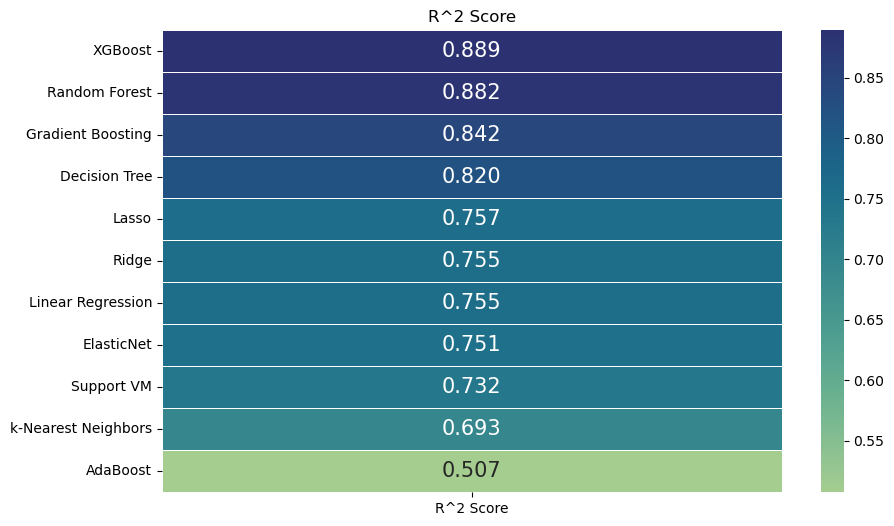

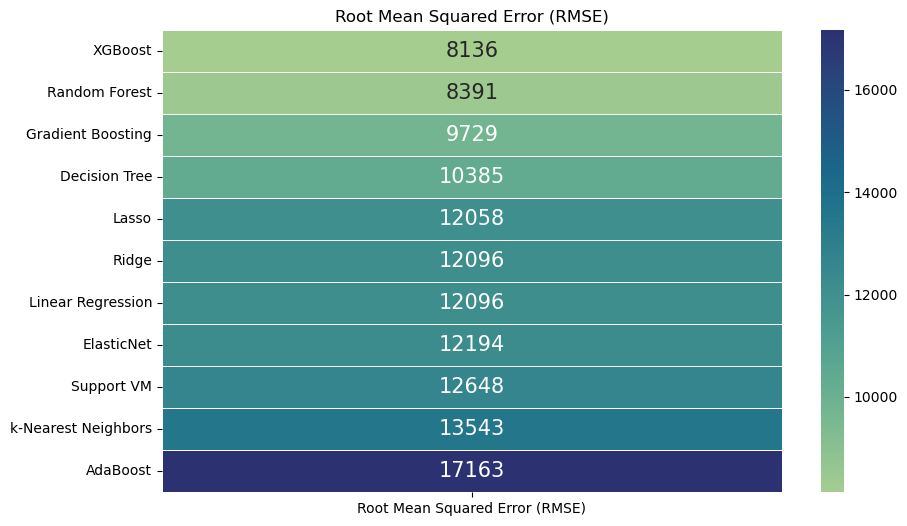

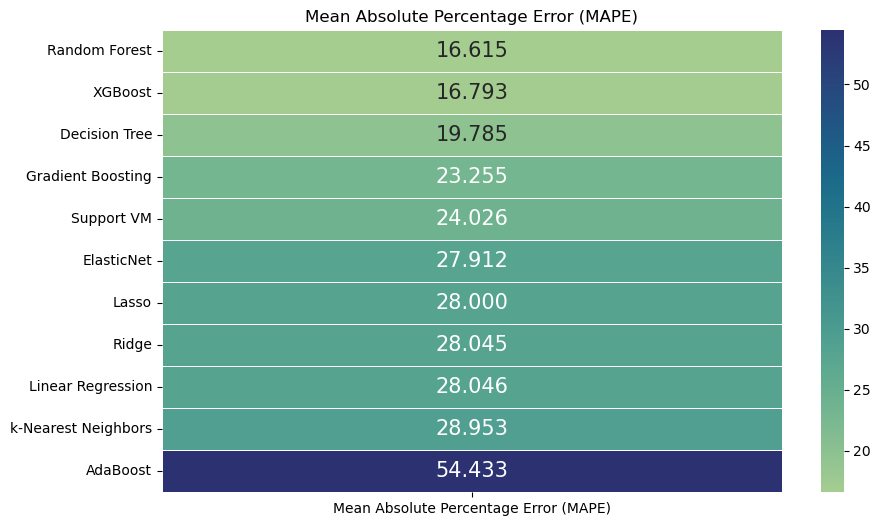

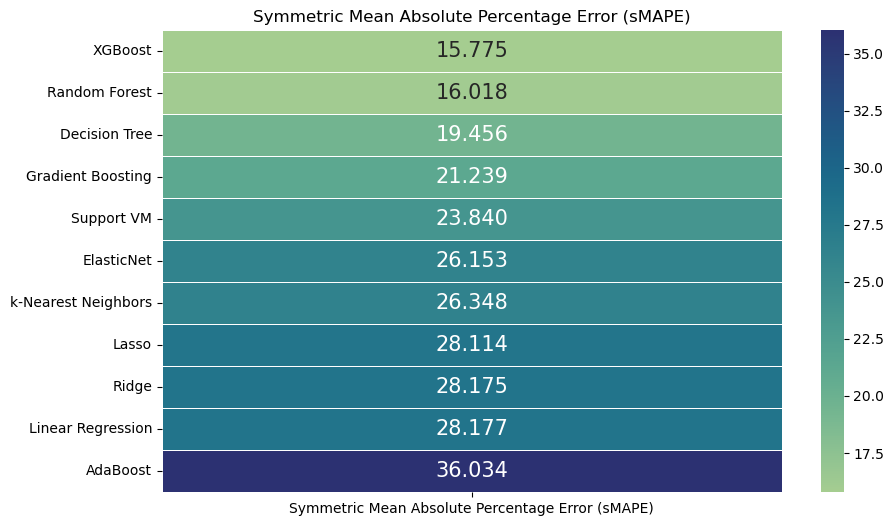

c:\Users\igorh\Desktop\VS 2022 files\gitlabson\dataanalystsandfriends\Bulldozers\classes_and_functions_bulldozers\custom_functions_classes.py:489: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  valid_series = aggregated_df.loc[metric].replace('Can\'t for negative output', np.nan).dropna()


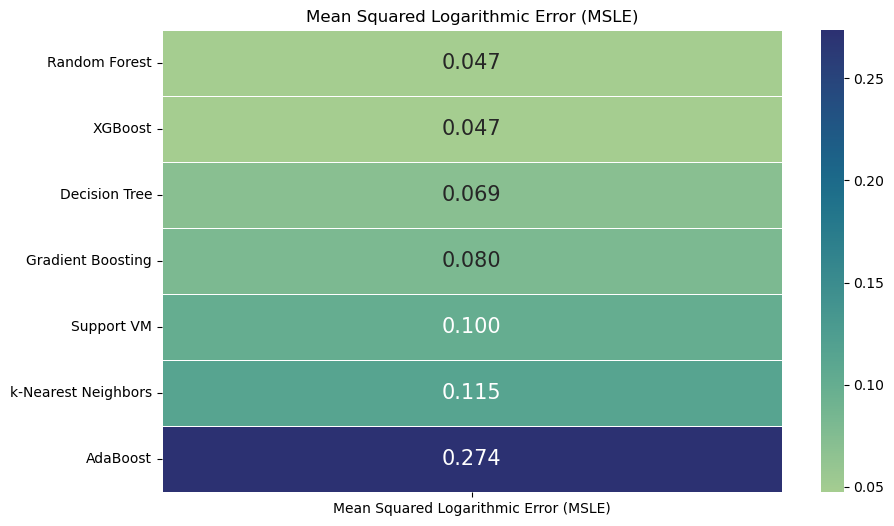

c:\Users\igorh\Desktop\VS 2022 files\gitlabson\dataanalystsandfriends\Bulldozers\classes_and_functions_bulldozers\custom_functions_classes.py:489: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  valid_series = aggregated_df.loc[metric].replace('Can\'t for negative output', np.nan).dropna()


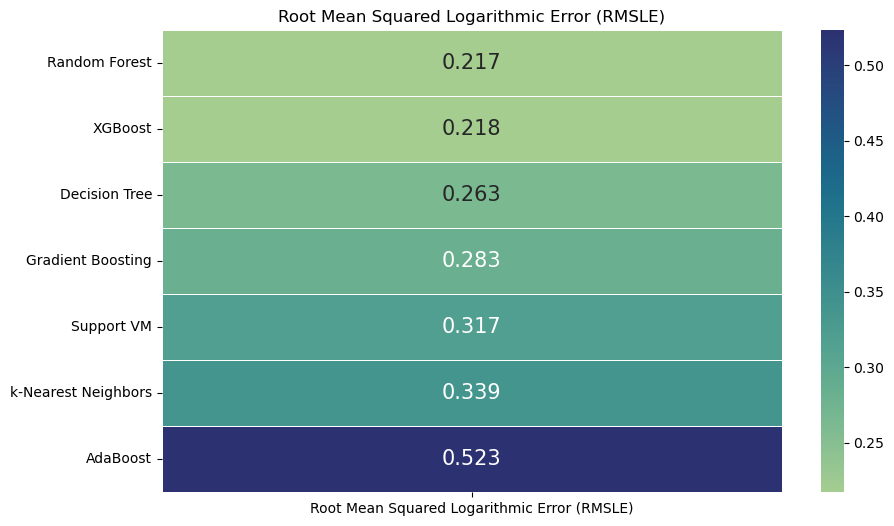

In [85]:
aggregate_metrics_and_create_heatmaps(metrics_list_valid)

___
# ***Test Data Scores***
___

## Managing test datasets

In [86]:
test_data = pd.read_csv('attachments_bulldozers_gh/Test.csv')
test_data.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand        saledate fiModelDesc  ...  \
0                    3688.0       Low   5/3/2012 0:00        580G  ...   
1                   28555.0      High  5/10/2012 0:00         936  ...   
2                    6038.0    Medium  5/10/2012 0:00    EC210BLC  ...   
3                    8940.0      High  5/10/2012 0:00       330CL  ...   
4                    2286.0       Low  5/10/2012 0:00        650K  ...   

  Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
0                     NaN                  NaN     NaN                  NaN   
1                     NaN                  NaN     NaN                  NaN   
2     None or Unspecified                9' 6"  Manual  None or Unspecified   
3     None or Unspecified  None or Unspecified  Manual                  Yes   
4                     NaN                  NaN     NaN                  NaN   

  Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
0          NaN                  NaN        NaN                  NaN   
1          NaN                  NaN        NaN                  NaN   
2       Double                  NaN        NaN                  NaN   
3       Triple                  NaN        NaN                  NaN   
4          NaN  None or Unspecified        PAT  None or Unspecified   

  Differential_Type Steering_Controls  
0               NaN               NaN  
1          Standard      Conventional  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 52 columns]

In [87]:
test_data = test_data.drop(columns=columns_to_terminate, axis=1) # Remove cols with a lot of nulls

test_data.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Enclosure', 'Hydraulics'],
      dtype='object')

In [88]:
for column in test_data.columns: # Replacing ['None or Unspecified','#NAME?'] to nan
    test_data[column] = test_data[column].map(lambda x: np.nan if x in ['None or Unspecified','#NAME?'] else x)

for column in test_data.columns: # Checking if ['None or Unspecified','#NAME?'] were replaced to nan
    if test_data[column].dtype == 'object':  # Check if the column is categorical
        unique_values = test_data[column].unique()
        if 'None or Unspecified' in unique_values or '#NAME?' in unique_values:
            print('replacing failed')

In [89]:
nulls_percentage_after = test_data.isnull().mean() * 100
print('Percentage of nulls in each feature')
nulls_percentage_after

Percentage of nulls in each feature


SalesID                0.000000
MachineID              0.000000
ModelID                0.000000
datasource             0.000000
auctioneerID           0.000000
YearMade               0.000000
saledate               0.000000
fiModelDesc            0.000000
fiBaseModel            0.000000
fiSecondaryDesc       31.909770
fiProductClassDesc     0.000000
state                  0.000000
ProductGroup           0.000000
ProductGroupDesc       0.000000
Enclosure              0.016055
Hydraulics            17.195151
dtype: float64

In [90]:
test_data['saledate'] = pd.to_datetime(test_data['saledate'])
test_data['saledate'].dtype

dtype('<M8[ns]')

In [91]:
test_data['YearOfSale'] = test_data['saledate'].dt.year
test_data['MonthOfSale'] = test_data['saledate'].dt.month
test_data['DayOfSale'] = test_data['saledate'].dt.day
test_data = test_data.drop(columns=['saledate'], axis=1)
test_data

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0      1227829    1006309     3168         121             3      1999   
1      1227844    1022817     7271         121             3      1000   
2      1227847    1031560    22805         121             3      2004   
3      1227848      56204     1269         121             3      2006   
4      1227863    1053887    22312         121             3      2005   
...        ...        ...      ...         ...           ...       ...   
12452  6643171    2558317    21450         149             2      2008   
12453  6643173    2558332    21434         149             2      2005   
12454  6643184    2558342    21437         149             2      1000   
12455  6643186    2558343    21437         149             2      2006   
12456  6643196    2558346    21446         149             2      2008   

      fiModelDesc fiBaseModel fiSecondaryDesc  \
0            580G         580               G   
1             936         936             NaN   
2        EC210BLC       EC210               B   
3           330CL         330               C   
4            650K         650               K   
...           ...         ...             ...   
12452       80NX3          80              NX   
12453         28N          28               N   
12454         35N          35               N   
12455         35N          35               N   
12456        55N2          55               N   

                                      fiProductClassDesc       state  \
0      Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...     Wyoming   
1               Wheel Loader - 135.0 to 150.0 Horsepower    Virginia   
2      Hydraulic Excavator, Track - 21.0 to 24.0 Metr...  New Jersey   
3      Hydraulic Excavator, Track - 33.0 to 40.0 Metr...  New Jersey   
4      Track Type Tractor, Dozer - 20.0 to 75.0 Horse...     Florida   
...                                                  ...         ...   
12452  Hydraulic Excavator, Track - 8.0 to 11.0 Metri...     Florida   
12453  Hydraulic Excavator, Track - 2.0 to 3.0 Metric...     Florida   
12454  Hydraulic Excavator, Track - 3.0 to 4.0 Metric...     Florida   
12455  Hydraulic Excavator, Track - 3.0 to 4.0 Metric...     Florida   
12456  Hydraulic Excavator, Track - 5.0 to 6.0 Metric...     Georgia   

      ProductGroup     ProductGroupDesc   Enclosure Hydraulics  YearOfSale  \
0               BL      Backhoe Loaders       OROPS        NaN        2012   
1               WL         Wheel Loader       EROPS    2 Valve        2012   
2              TEX     Track Excavators  EROPS w AC  Auxiliary        2012   
3              TEX     Track Excavators  EROPS w AC   Standard        2012   
4              TTT  Track Type Tractors       OROPS    2 Valve        2012   
...            ...                  ...         ...        ...         ...   
12452          TEX     Track Excavators  EROPS w AC  Auxiliary        2012   
12453          TEX     Track Excavators       EROPS   Standard        2012   
12454          TEX     Track Excavators       EROPS   Standard        2012   
12455          TEX     Track Excavators       EROPS   Standard        2012   
12456          TEX     Track Excavators       EROPS   Standard        2012   

       MonthOfSale  DayOfSale  
0                5          3  
1                5         10  
2                5         10  
3                5         10  
4                5         10  
...            ...        ...  
12452           10         24  
12453           10         24  
12454           10         24  
12455           10         24  
12456            9         19  

[12457 rows x 18 columns]

In [92]:
int(test_data['YearMade'].mean().round())

1869

In [93]:
no_suspicious_values_year_made = test_data[~test_data['YearMade'].isin([1000, 1900])]
no_suspicious_values_year_made

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0      1227829    1006309     3168         121             3      1999   
2      1227847    1031560    22805         121             3      2004   
3      1227848      56204     1269         121             3      2006   
4      1227863    1053887    22312         121             3      2005   
5      1227870    1068694    16747         121             3      2007   
...        ...        ...      ...         ...           ...       ...   
12451  6643170    2558316    21450         149             2      2006   
12452  6643171    2558317    21450         149             2      2008   
12453  6643173    2558332    21434         149             2      2005   
12455  6643186    2558343    21437         149             2      2006   
12456  6643196    2558346    21446         149             2      2008   

      fiModelDesc fiBaseModel fiSecondaryDesc  \
0            580G         580               G   
2        EC210BLC       EC210               B   
3           330CL         330               C   
4            650K         650               K   
5         WB146-5       WB146             NaN   
...           ...         ...             ...   
12451       80NX3          80              NX   
12452       80NX3          80              NX   
12453         28N          28               N   
12455         35N          35               N   
12456        55N2          55               N   

                                      fiProductClassDesc       state  \
0      Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...     Wyoming   
2      Hydraulic Excavator, Track - 21.0 to 24.0 Metr...  New Jersey   
3      Hydraulic Excavator, Track - 33.0 to 40.0 Metr...  New Jersey   
4      Track Type Tractor, Dozer - 20.0 to 75.0 Horse...     Florida   
5      Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...  New Jersey   
...                                                  ...         ...   
12451  Hydraulic Excavator, Track - 8.0 to 11.0 Metri...     Florida   
12452  Hydraulic Excavator, Track - 8.0 to 11.0 Metri...     Florida   
12453  Hydraulic Excavator, Track - 2.0 to 3.0 Metric...     Florida   
12455  Hydraulic Excavator, Track - 3.0 to 4.0 Metric...     Florida   
12456  Hydraulic Excavator, Track - 5.0 to 6.0 Metric...     Georgia   

      ProductGroup     ProductGroupDesc   Enclosure Hydraulics  YearOfSale  \
0               BL      Backhoe Loaders       OROPS        NaN        2012   
2              TEX     Track Excavators  EROPS w AC  Auxiliary        2012   
3              TEX     Track Excavators  EROPS w AC   Standard        2012   
4              TTT  Track Type Tractors       OROPS    2 Valve        2012   
5               BL      Backhoe Loaders  EROPS w AC        NaN        2012   
...            ...                  ...         ...        ...         ...   
12451          TEX     Track Excavators       EROPS   Standard        2012   
12452          TEX     Track Excavators  EROPS w AC  Auxiliary        2012   
12453          TEX     Track Excavators       EROPS   Standard        2012   
12455          TEX     Track Excavators       EROPS   Standard        2012   
12456          TEX     Track Excavators       EROPS   Standard        2012   

       MonthOfSale  DayOfSale  
0                5          3  
2                5         10  
3                5         10  
4                5         10  
5                5          3  
...            ...        ...  
12451           10         24  
12452           10         24  
12453           10         24  
12455           10         24  
12456            9         19  

[10819 rows x 18 columns]

In [94]:
mean_to_impute_year_made = int(no_suspicious_values_year_made['YearMade'].mean().round())
mean_to_impute_year_made

2000

In [95]:
test_data['YearMade'] = test_data['YearMade'].map(lambda x: x if x not in [1000, 1900] else mean_to_impute_year_made)
test_data

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0      1227829    1006309     3168         121             3      1999   
1      1227844    1022817     7271         121             3      2000   
2      1227847    1031560    22805         121             3      2004   
3      1227848      56204     1269         121             3      2006   
4      1227863    1053887    22312         121             3      2005   
...        ...        ...      ...         ...           ...       ...   
12452  6643171    2558317    21450         149             2      2008   
12453  6643173    2558332    21434         149             2      2005   
12454  6643184    2558342    21437         149             2      2000   
12455  6643186    2558343    21437         149             2      2006   
12456  6643196    2558346    21446         149             2      2008   

      fiModelDesc fiBaseModel fiSecondaryDesc  \
0            580G         580               G   
1             936         936             NaN   
2        EC210BLC       EC210               B   
3           330CL         330               C   
4            650K         650               K   
...           ...         ...             ...   
12452       80NX3          80              NX   
12453         28N          28               N   
12454         35N          35               N   
12455         35N          35               N   
12456        55N2          55               N   

                                      fiProductClassDesc       state  \
0      Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...     Wyoming   
1               Wheel Loader - 135.0 to 150.0 Horsepower    Virginia   
2      Hydraulic Excavator, Track - 21.0 to 24.0 Metr...  New Jersey   
3      Hydraulic Excavator, Track - 33.0 to 40.0 Metr...  New Jersey   
4      Track Type Tractor, Dozer - 20.0 to 75.0 Horse...     Florida   
...                                                  ...         ...   
12452  Hydraulic Excavator, Track - 8.0 to 11.0 Metri...     Florida   
12453  Hydraulic Excavator, Track - 2.0 to 3.0 Metric...     Florida   
12454  Hydraulic Excavator, Track - 3.0 to 4.0 Metric...     Florida   
12455  Hydraulic Excavator, Track - 3.0 to 4.0 Metric...     Florida   
12456  Hydraulic Excavator, Track - 5.0 to 6.0 Metric...     Georgia   

      ProductGroup     ProductGroupDesc   Enclosure Hydraulics  YearOfSale  \
0               BL      Backhoe Loaders       OROPS        NaN        2012   
1               WL         Wheel Loader       EROPS    2 Valve        2012   
2              TEX     Track Excavators  EROPS w AC  Auxiliary        2012   
3              TEX     Track Excavators  EROPS w AC   Standard        2012   
4              TTT  Track Type Tractors       OROPS    2 Valve        2012   
...            ...                  ...         ...        ...         ...   
12452          TEX     Track Excavators  EROPS w AC  Auxiliary        2012   
12453          TEX     Track Excavators       EROPS   Standard        2012   
12454          TEX     Track Excavators       EROPS   Standard        2012   
12455          TEX     Track Excavators       EROPS   Standard        2012   
12456          TEX     Track Excavators       EROPS   Standard        2012   

       MonthOfSale  DayOfSale  
0                5          3  
1                5         10  
2                5         10  
3                5         10  
4                5         10  
...            ...        ...  
12452           10         24  
12453           10         24  
12454           10         24  
12455           10         24  
12456            9         19  

[12457 rows x 18 columns]

In [96]:
df_test_preprocessed = preprocessing_pipeline.transform(test_data)

In [97]:
df_test_preprocessed

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0      1227829    1006309     3168         121             3  0.860215   
1      1227844    1022817     7271         121             3  0.870968   
2      1227847    1031560    22805         121             3  0.913978   
3      1227848      56204     1269         121             3  0.935484   
4      1227863    1053887    22312         121             3  0.924731   
...        ...        ...      ...         ...           ...       ...   
12452  6643171    2558317    21450         149             2  0.956989   
12453  6643173    2558332    21434         149             2  0.924731   
12454  6643184    2558342    21437         149             2  0.870968   
12455  6643186    2558343    21437         149             2  0.935484   
12456  6643196    2558346    21446         149             2  0.956989   

       fiModelDesc  fiBaseModel  fiSecondaryDesc  state  ...  \
0            928.0        299.0             39.0   52.0  ...   
1           1507.0        478.0            131.0   47.0  ...   
2           2116.0        692.0             11.0   29.0  ...   
3            540.0        186.0             16.0   29.0  ...   
4           1044.0        323.0             52.0    8.0  ...   
...            ...          ...              ...    ...  ...   
12452       1323.0        389.0             72.0    8.0  ...   
12453        374.0        138.0             69.0    8.0  ...   
12454        593.0        196.0             69.0    8.0  ...   
12455        593.0        196.0             69.0    8.0  ...   
12456         -1.0        285.0             69.0    9.0  ...   

       Track Type Tractor, Dozer_75.0 to 85.0 Horsepower  \
0                                                    0.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
...                                                  ...   
12452                                                0.0   
12453                                                0.0   
12454                                                0.0   
12455                                                0.0   
12456                                                0.0   

       Track Type Tractor, Dozer_85.0 to 105.0 Horsepower  \
0                                                    0.0    
1                                                    0.0    
2                                                    0.0    
3                                                    0.0    
4                                                    0.0    
...                                                  ...    
12452                                                0.0    
12453                                                0.0    
12454                                                0.0    
12455                                                0.0    
12456                                                0.0    

       Track Type Tractor, Dozer_Unidentified  Track Type Tractor, Dozer_nan  \
0                                         0.0                            1.0   
1                                         0.0                            1.0   
2                                         0.0                            1.0   
3                                         0.0                            1.0   
4                                         0.0                            0.0   
...                                       ...                            ...   
12452                                     0.0                            1.0   
12453                                     0.0                            1.0   
12454                                     0.0                            1.0   
12455                                     0.0                            1.0   
12456          

In [98]:
df_test_target = pd.read_csv('attachments_bulldozers_gh/random_forest_benchmark_test.csv')
df_test_target = df_test_target['SalePrice']
df_test_target

0        13630.0
1        32530.0
2        48660.0
3        96080.0
4        27440.0
          ...   
12452    59080.0
12453    10165.0
12454    11125.0
12455    13720.0
12456    28810.0
Name: SalePrice, Length: 12457, dtype: float64

## Models on benchmark test

In [99]:
y_pred_test_xgb = xgb.predict(df_test_preprocessed)

metrics_xgb_test = calculate_metrics(df_test_target, y_pred_test_xgb, 'XGBoost')
metrics_xgb_test

XGBoost
R^2 Score                                            0.897081
Root Mean Squared Error (RMSE)                    7738.073973
Mean Absolute Percentage Error (MAPE)               16.595324
Symmetric Mean Absolute Percentage Error (sMAPE)    15.167050
Mean Squared Logarithmic Error (MSLE)                0.053661
Root Mean Squared Logarithmic Error (RMSLE)          0.231648

In [100]:
y_pred_test_rfr = RFR_model.predict(df_test_preprocessed)

metrics_rf_test = calculate_metrics(df_test_target, y_pred_test_rfr, 'Random Forest')
metrics_rf_test

Random Forest
R^2 Score                                              0.875805
Root Mean Squared Error (RMSE)                      8500.372535
Mean Absolute Percentage Error (MAPE)                 17.283073
Symmetric Mean Absolute Percentage Error (sMAPE)      14.579201
Mean Squared Logarithmic Error (MSLE)                  0.056142
Root Mean Squared Logarithmic Error (RMSLE)            0.236943